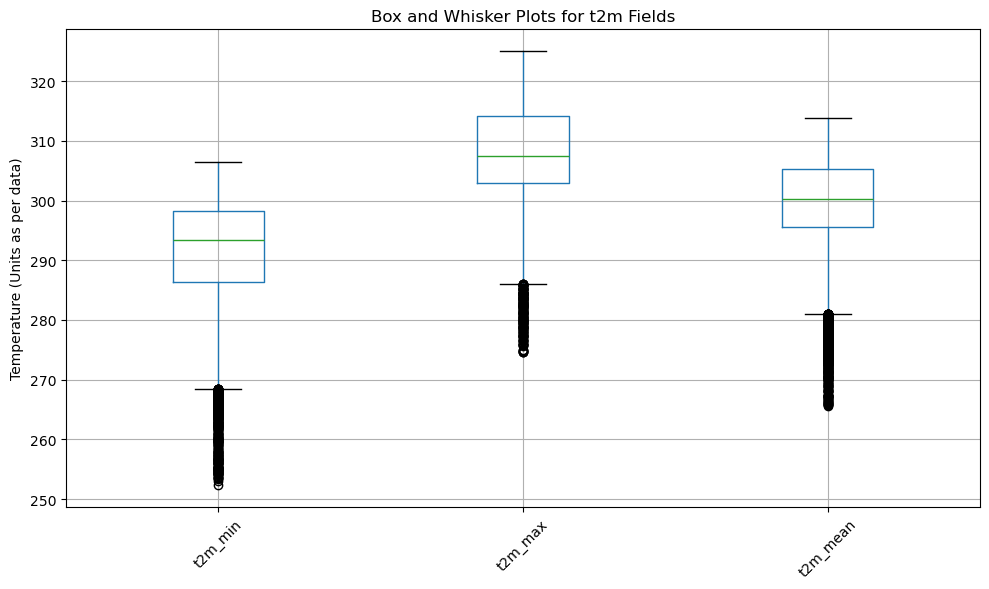

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path (use raw string to handle backslashes)
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"

# Read the CSV file; note that the file appears to be tab-delimited
df = pd.read_csv(file_path, delimiter=',')

# Exclude unwanted columns
cols_to_exclude = ['lon', 'lat', 'time', 'level', 
                   'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1', 
                   'Month', 'Country', 'h3_res_3', 'h3_res_4']
df = df.drop(columns=cols_to_exclude, errors='ignore')

# Identify t2m columns (columns whose names start with "t2m")
t2m_columns = [col for col in df.columns if col.startswith('t2m')]

# Convert t2m columns from string to numeric; non-convertible values become NaN
for col in t2m_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create box and whisker plots for the t2m fields
plt.figure(figsize=(10, 6))
df[t2m_columns].boxplot()
plt.title('Box and Whisker Plots for t2m Fields')
plt.ylabel('Temperature (Units as per data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


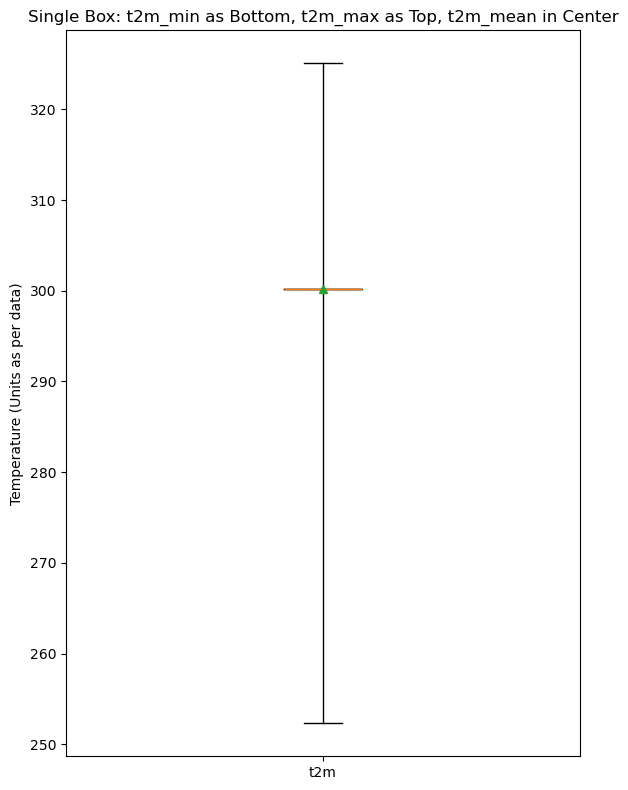

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Read and clean your data
# --------------------------------------------------
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"
df = pd.read_csv(file_path, delimiter=',')

# Drop the columns you do not need
cols_to_exclude = [
    'lon', 'lat', 'time', 'level',
    'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1',
    'Month', 'Country', 'h3_res_3', 'h3_res_4'
]
df.drop(columns=cols_to_exclude, inplace=True, errors='ignore')

# Convert t2m columns to numeric
for col in ['t2m_min', 't2m_mean', 't2m_max']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --------------------------------------------------
# 2. Compute a single min/mean/max for the entire dataset
# --------------------------------------------------
global_min  = df['t2m_min'].min()
global_mean = df['t2m_mean'].mean()
global_max  = df['t2m_max'].max()

# --------------------------------------------------
# 3. Build custom stats for a single box
# --------------------------------------------------
# We force Q1 = Q3 = median = mean, and whiskers = global min & max.
# No outliers are shown (fliers = []).
box_stats = [{
    'mean':   global_mean,   # if you set showmeans=True, you'll see this marker
    'med':    global_mean,   # force 'median' to the mean
    'q1':     global_mean,   
    'q3':     global_mean,
    'whislo': global_min,    # bottom whisker
    'whishi': global_max,    # top whisker
    'fliers': []             # no outliers
}]

# --------------------------------------------------
# 4. Plot with bxp
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 8))
ax.bxp(box_stats, showmeans=True, meanline=False)
ax.set_xticklabels(['t2m'])  # Just one box, label it
ax.set_ylabel('Temperature (Units as per data)')
ax.set_title("Single Box: t2m_min as Bottom, t2m_max as Top, t2m_mean in Center")
plt.tight_layout()
plt.show()


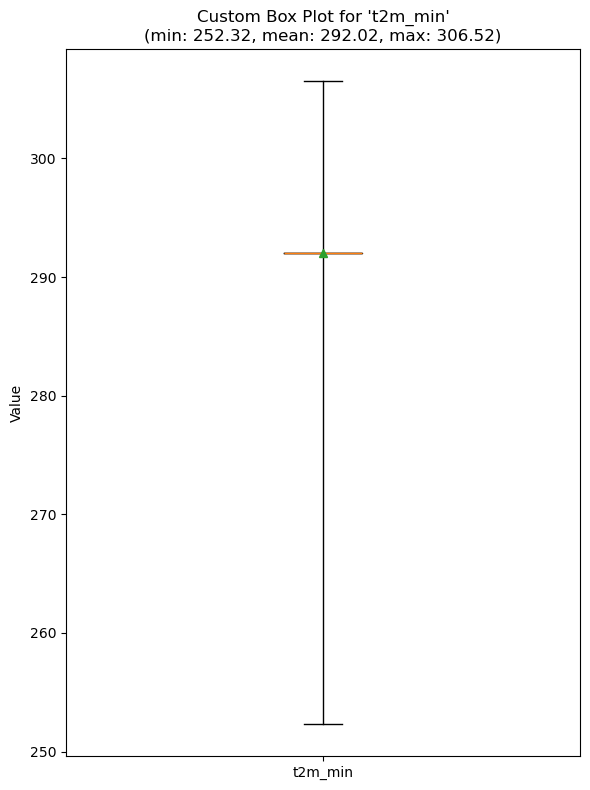

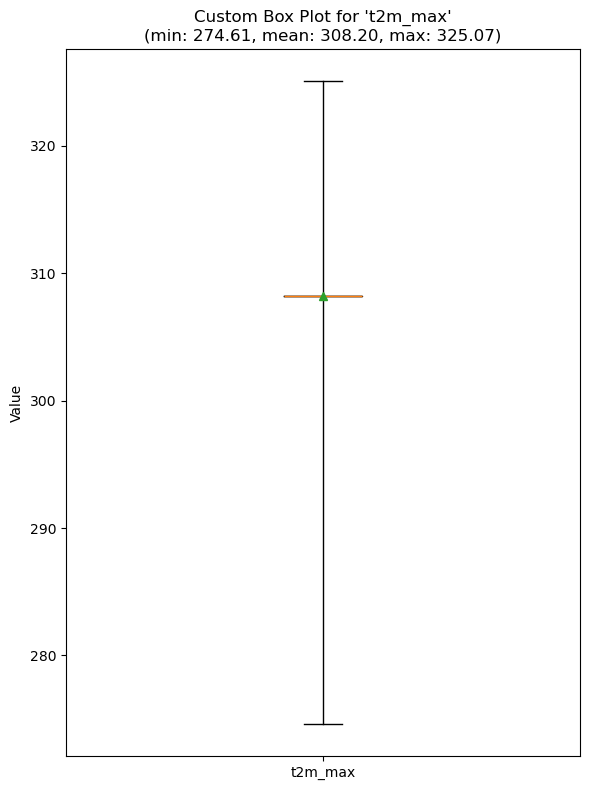

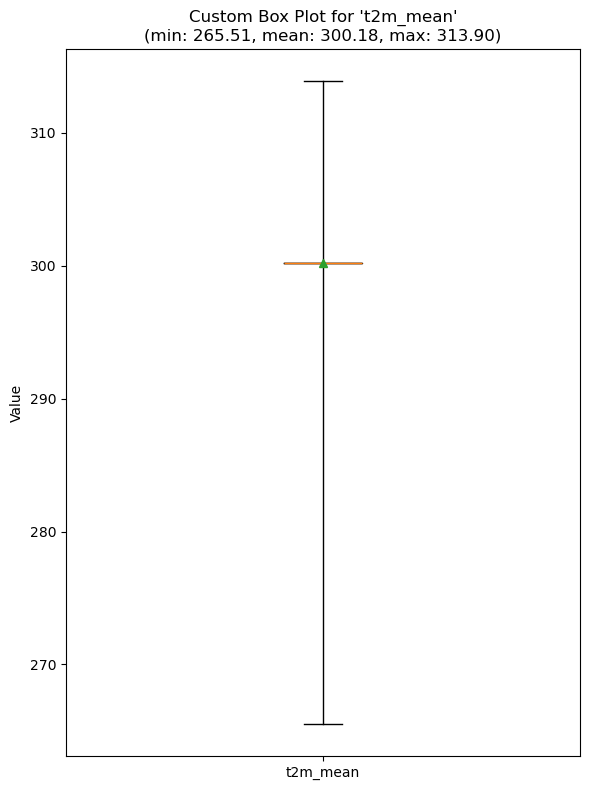

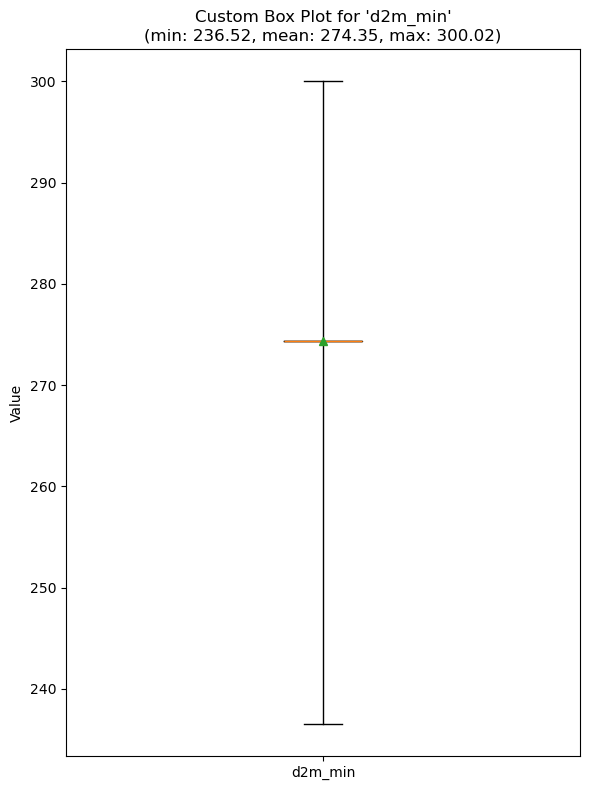

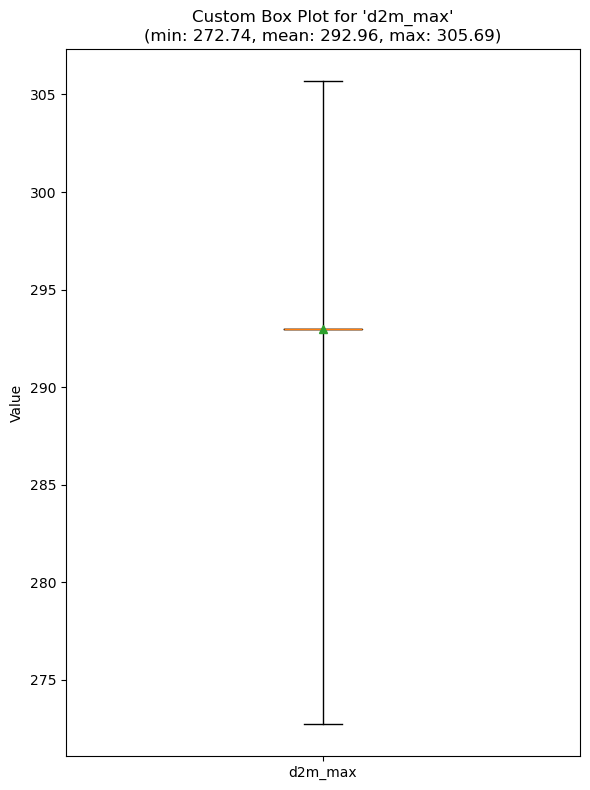

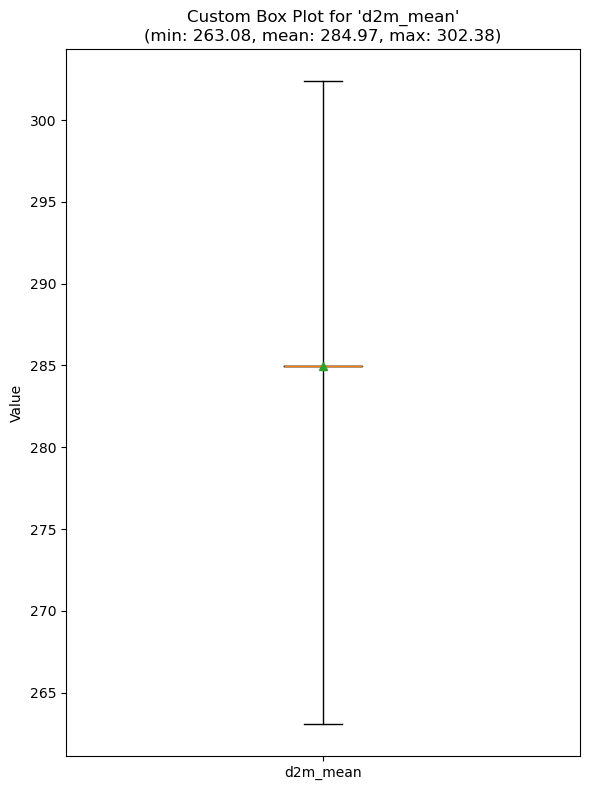

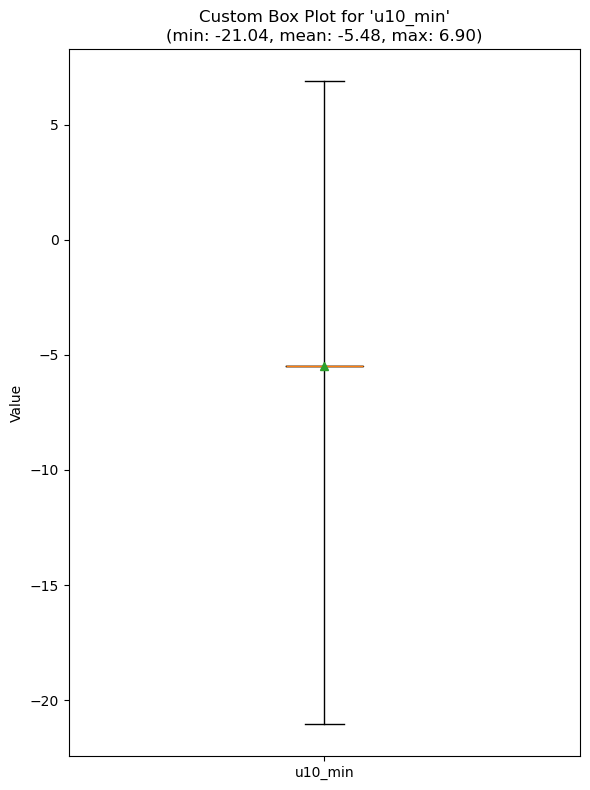

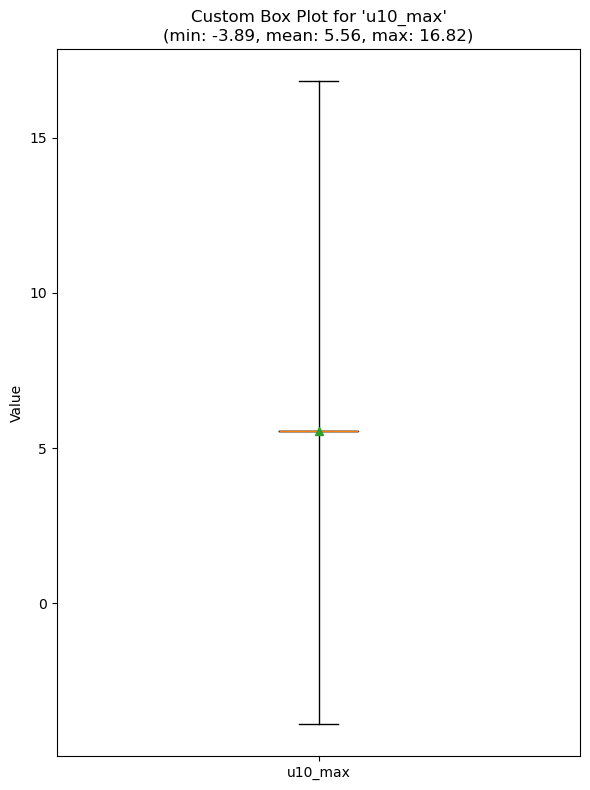

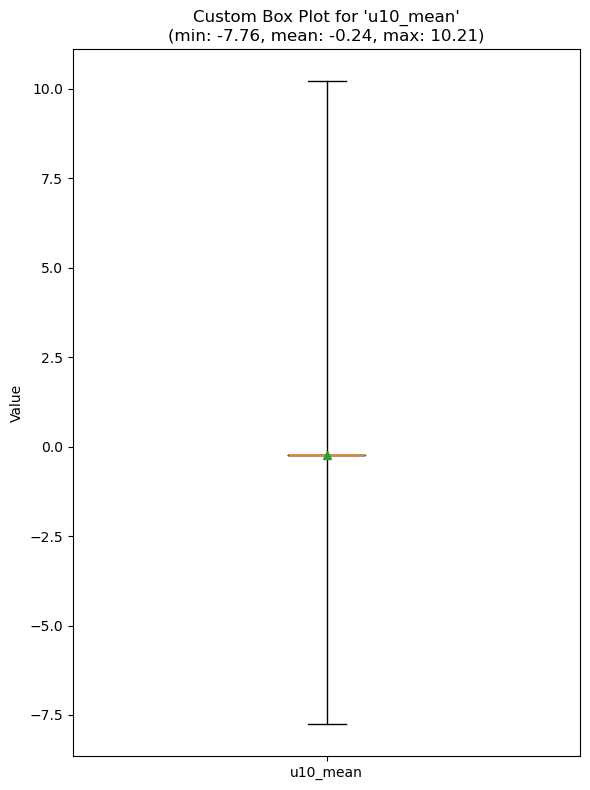

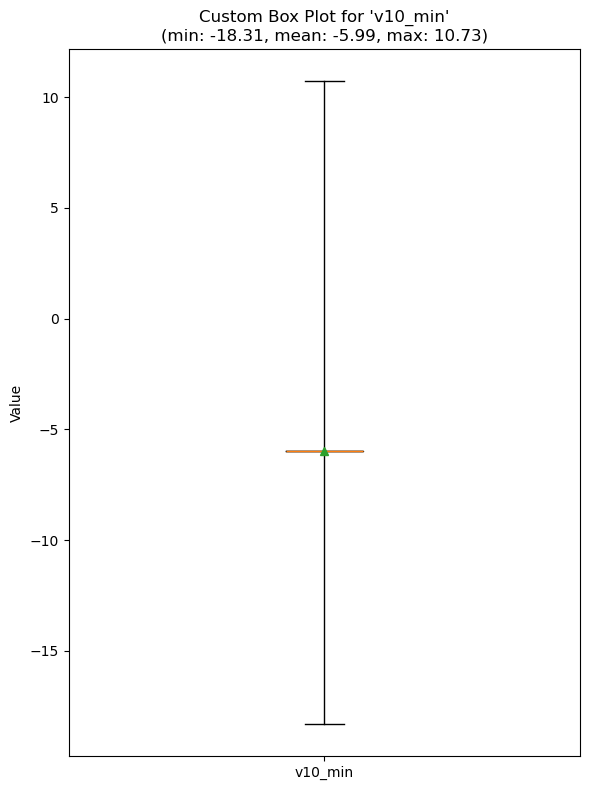

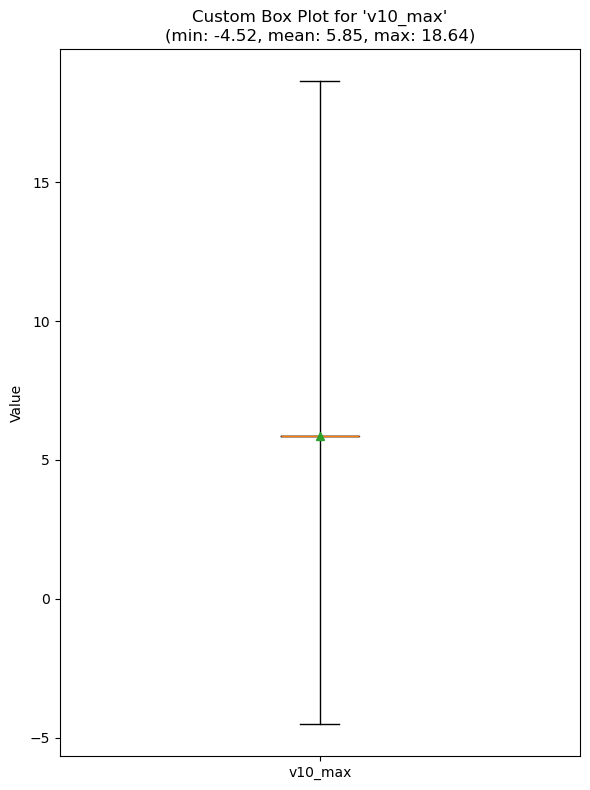

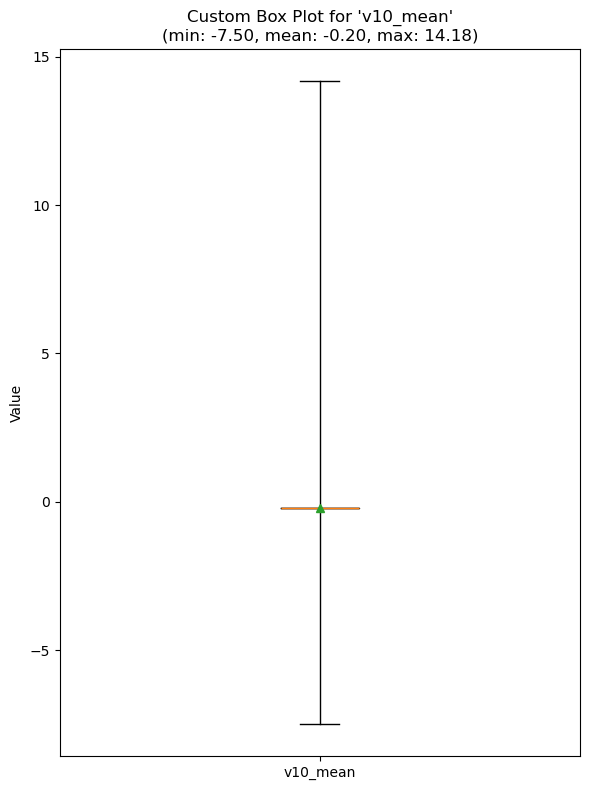

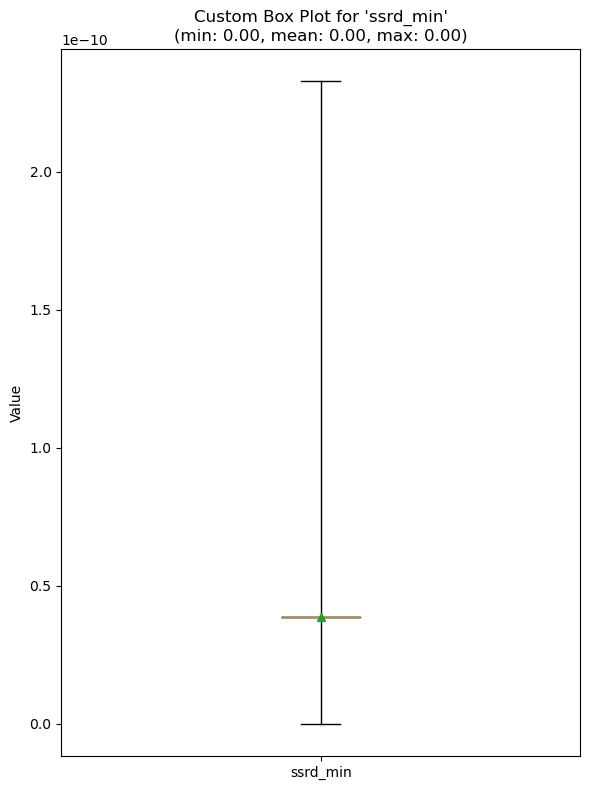

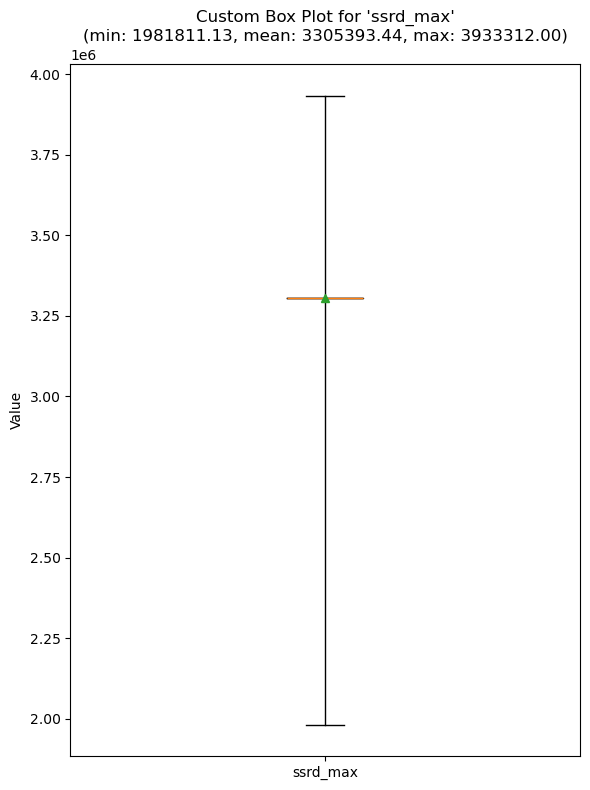

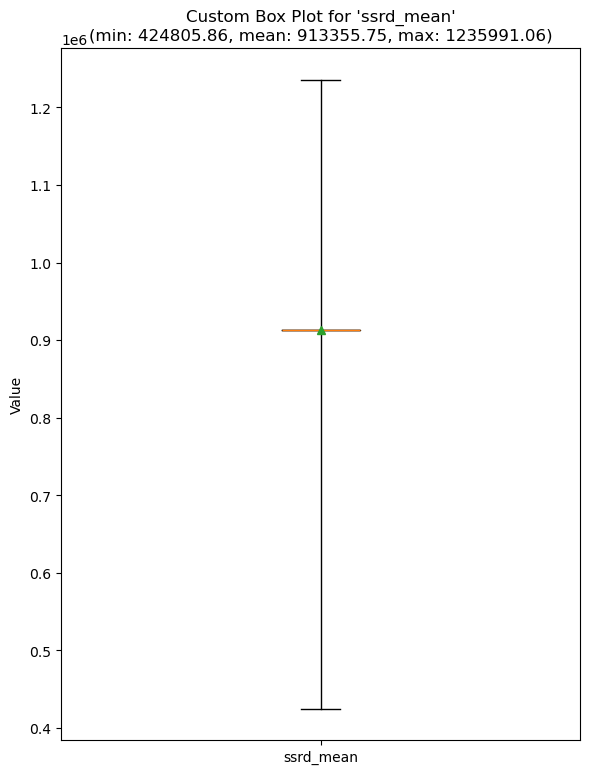

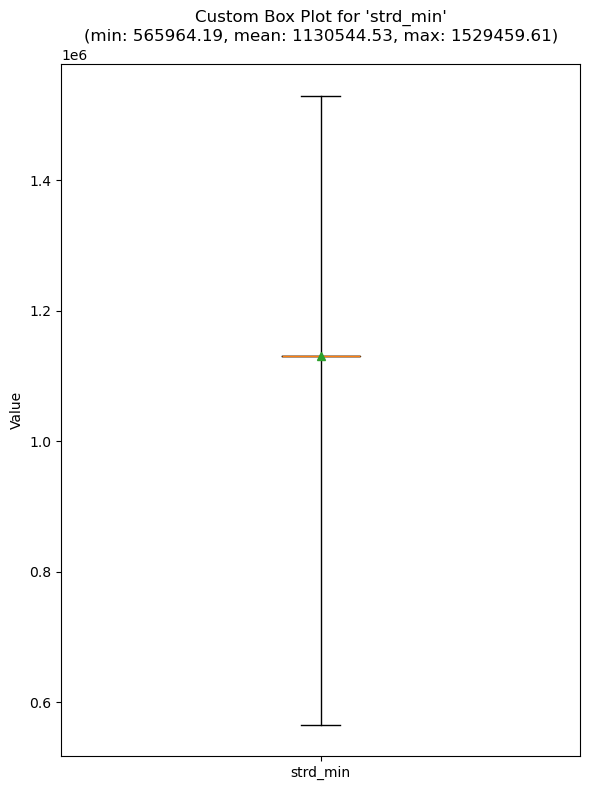

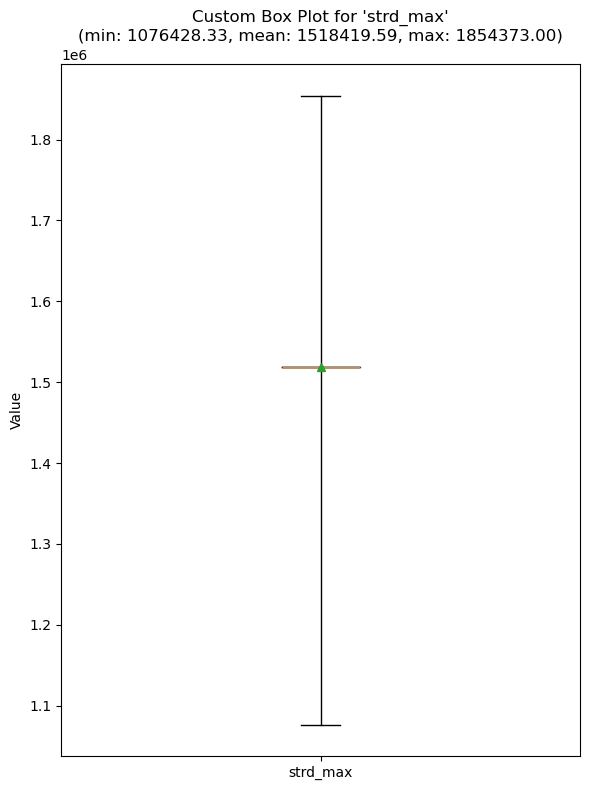

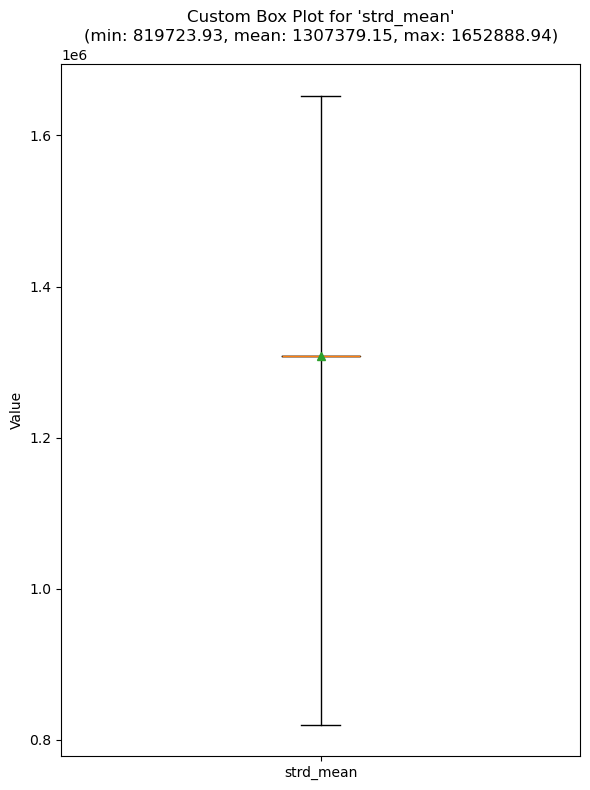

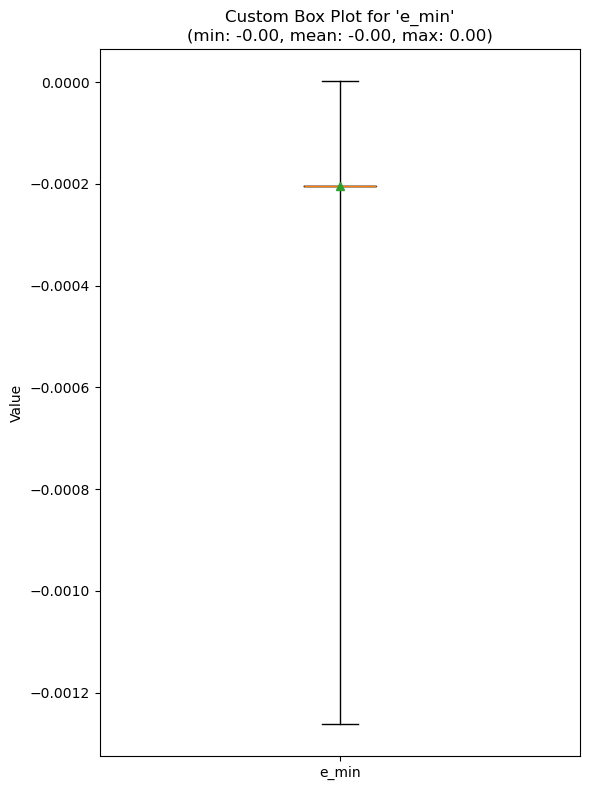

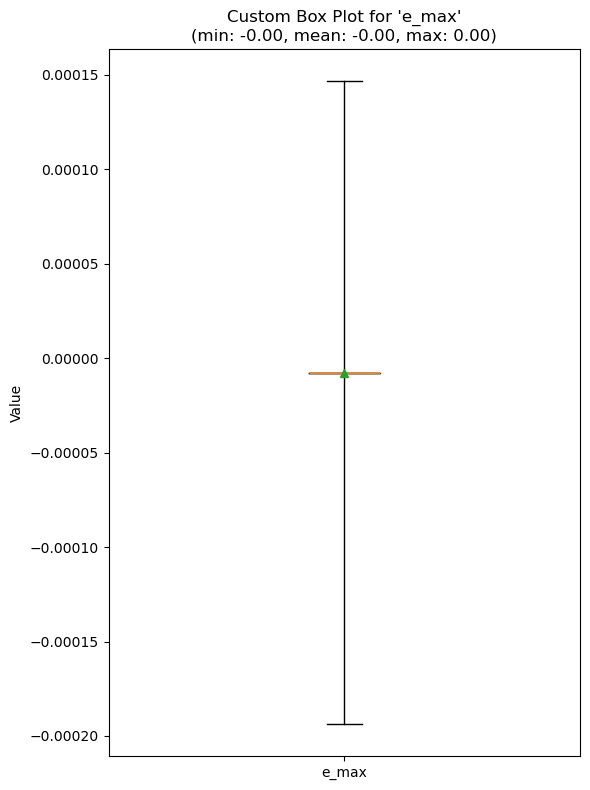

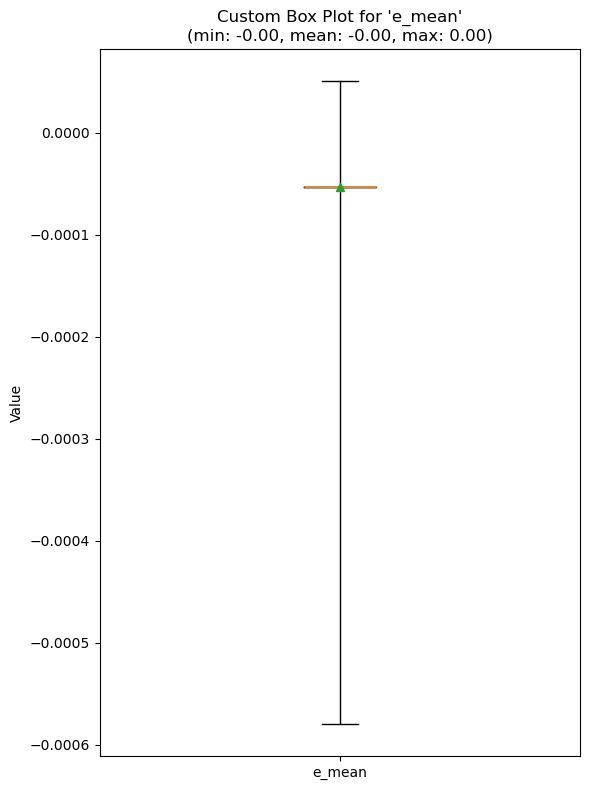

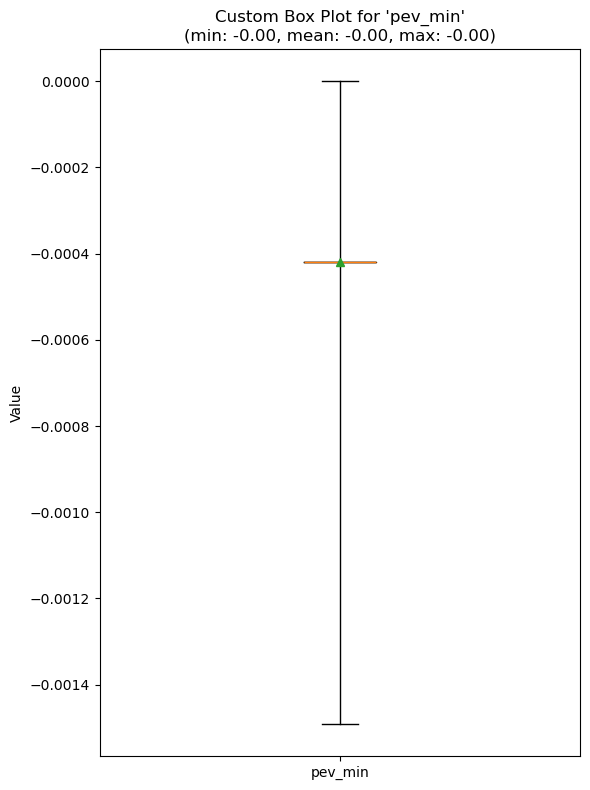

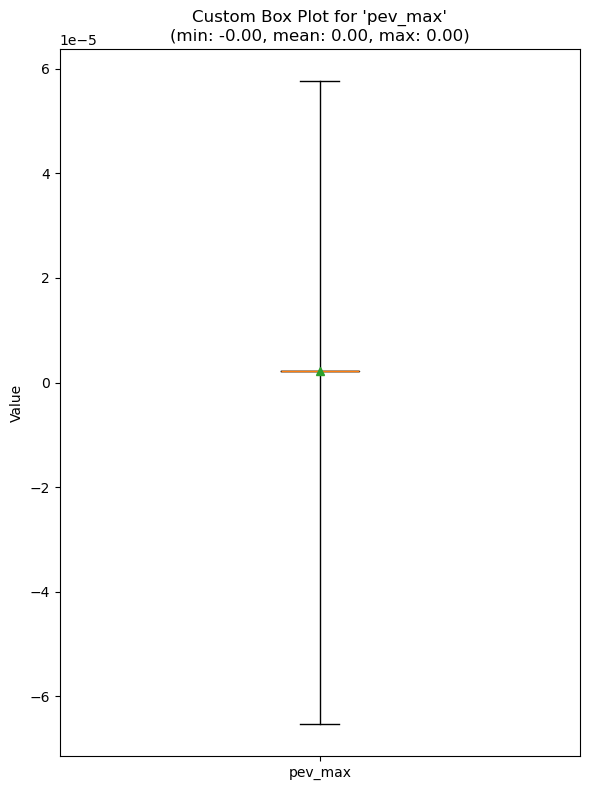

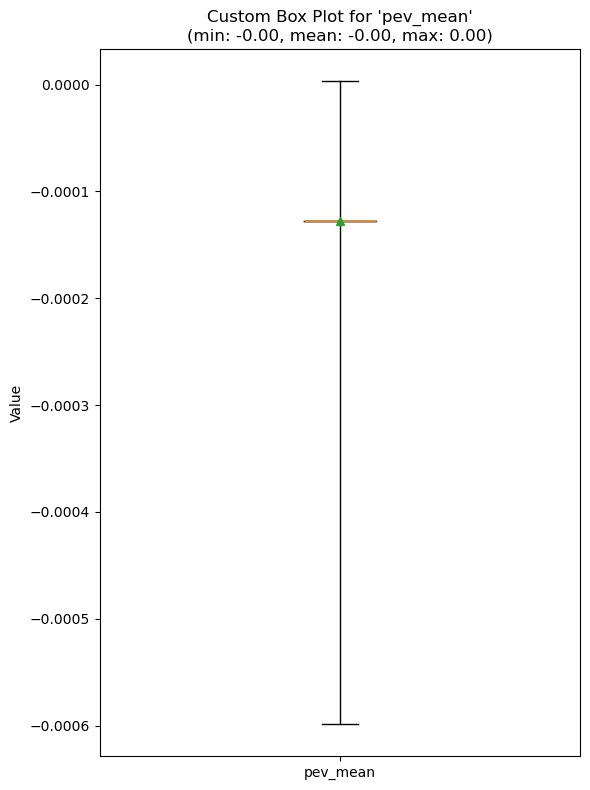

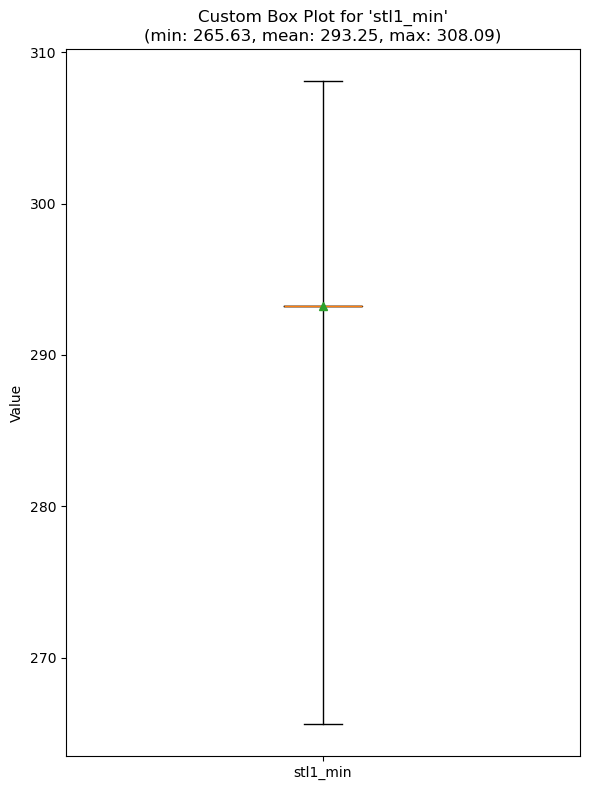

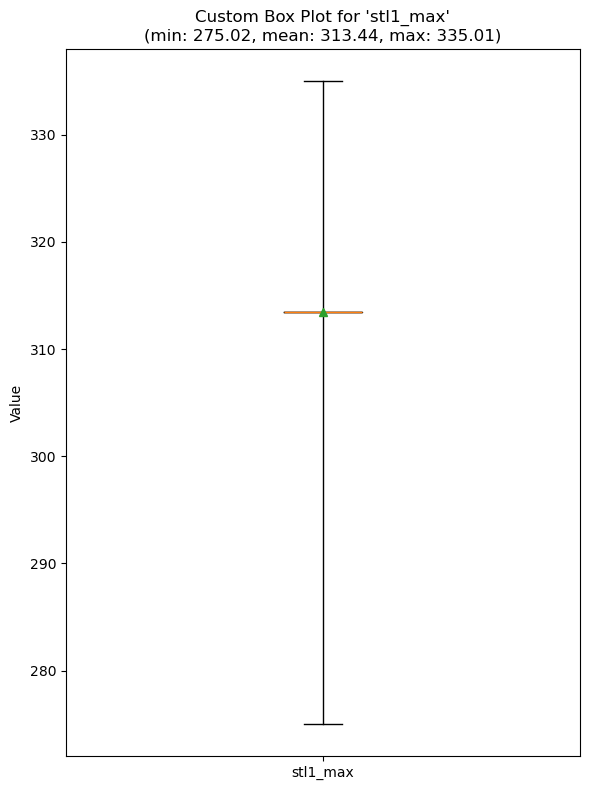

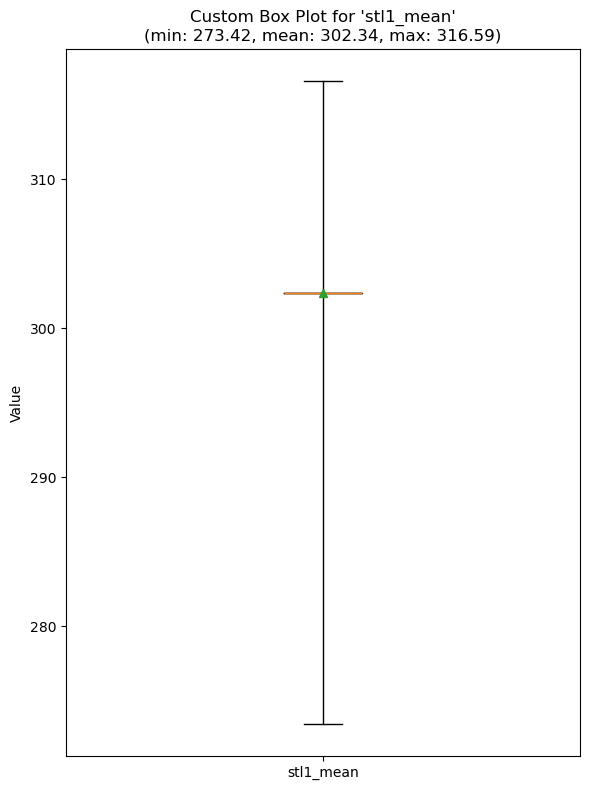

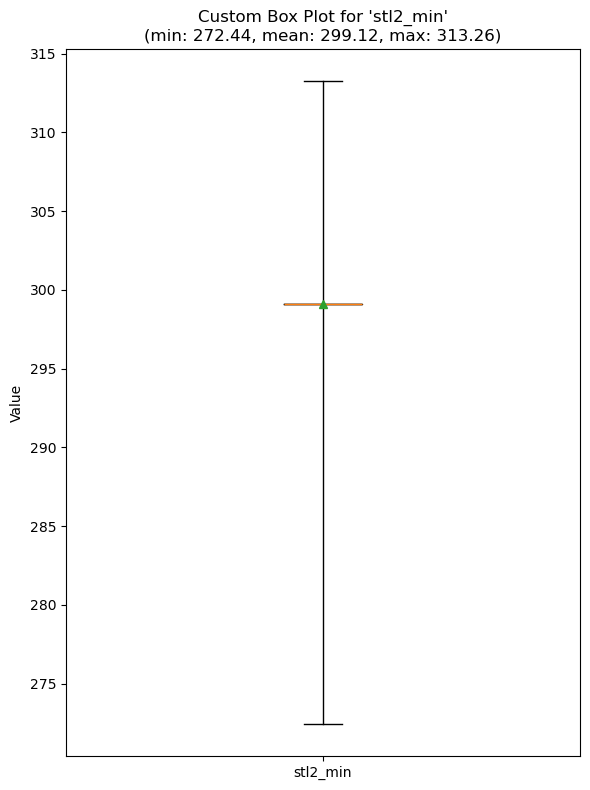

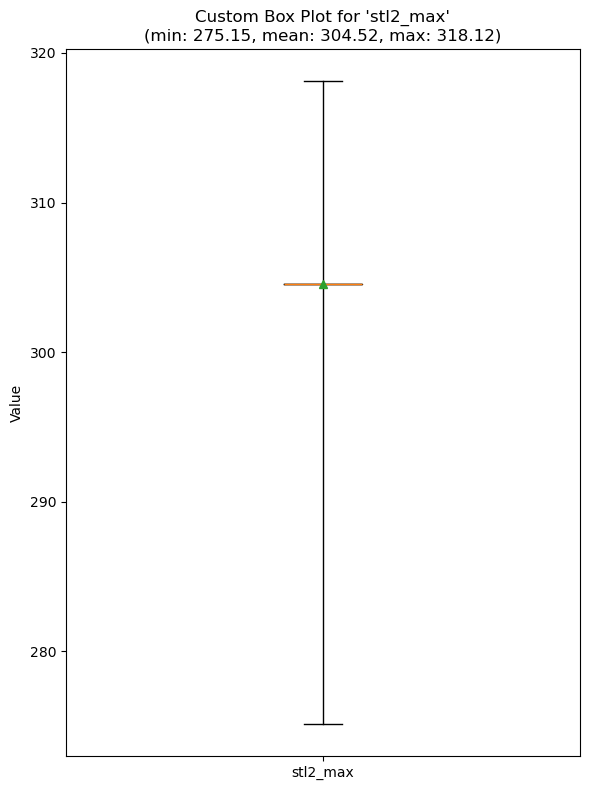

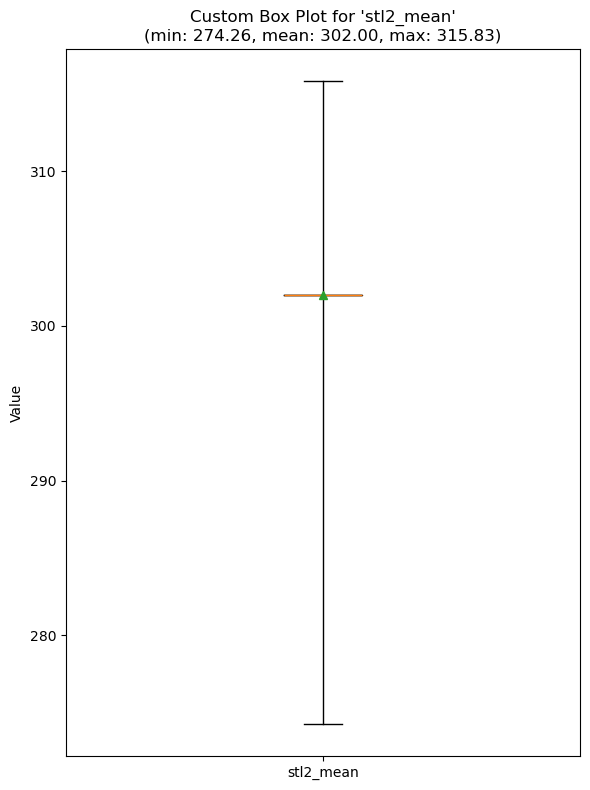

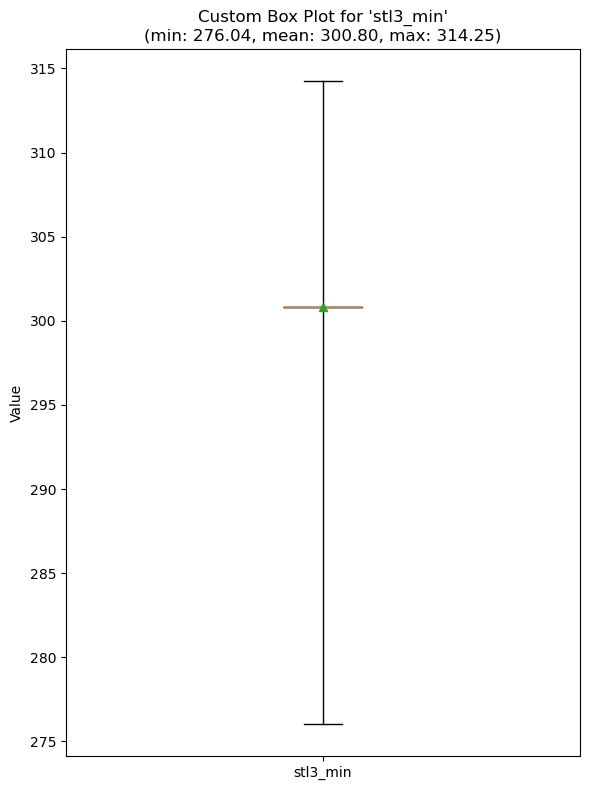

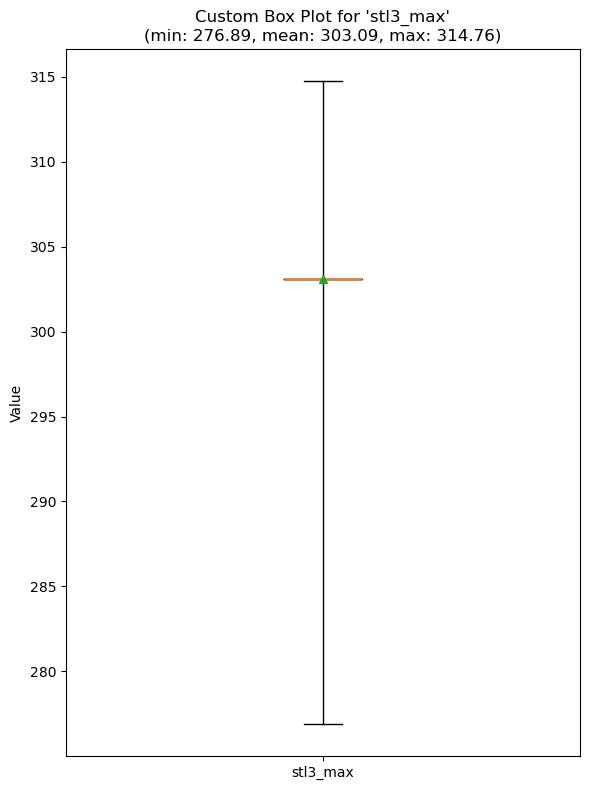

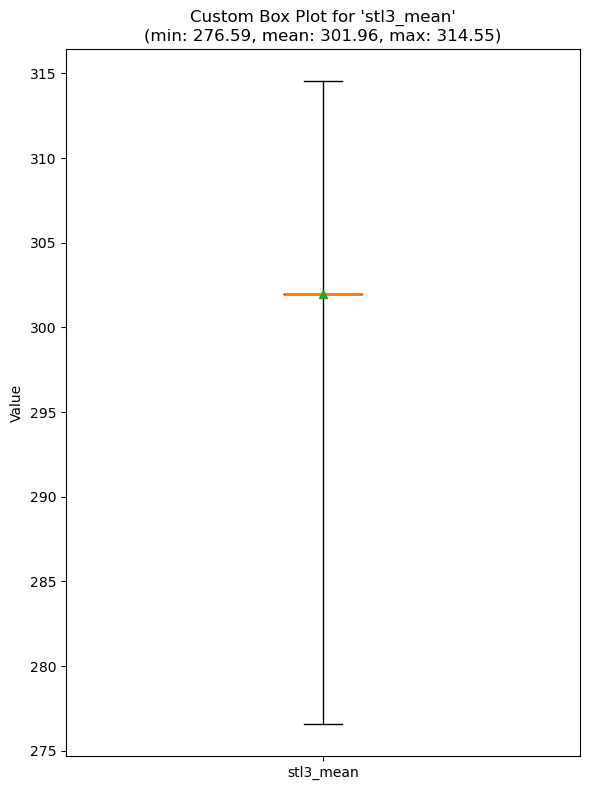

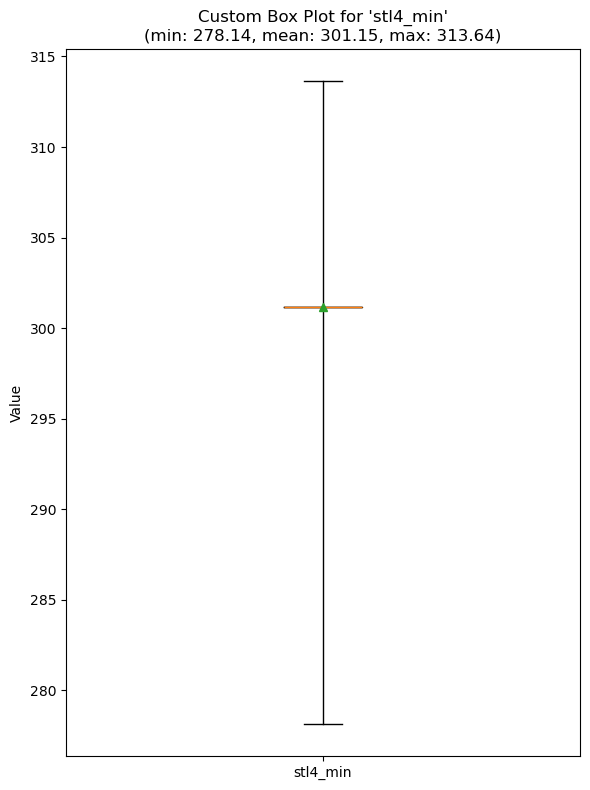

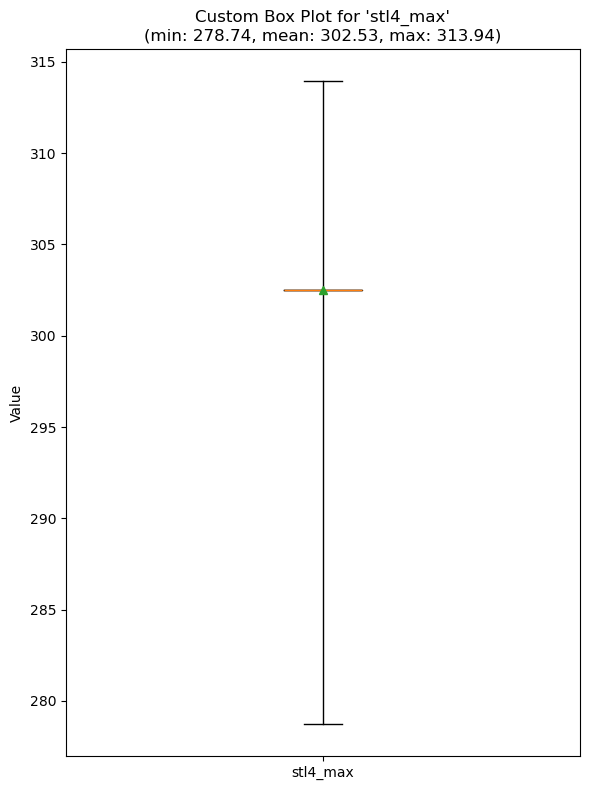

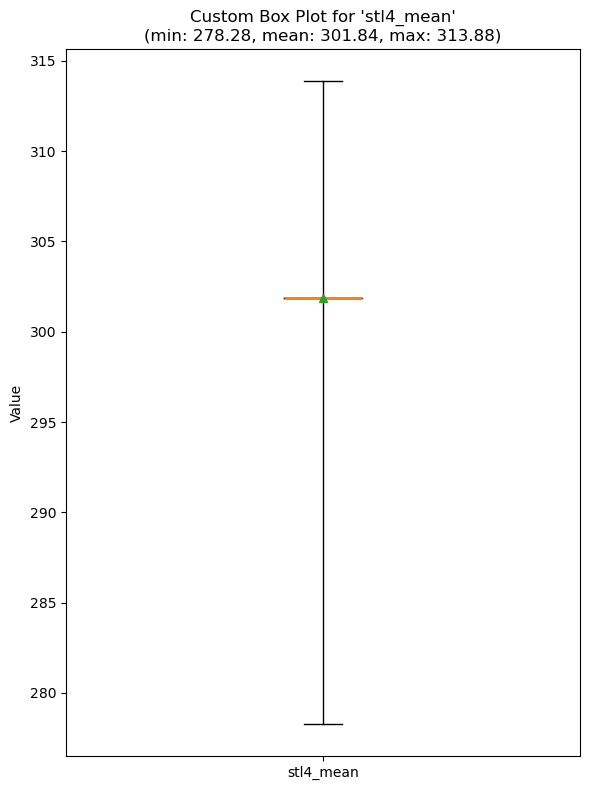

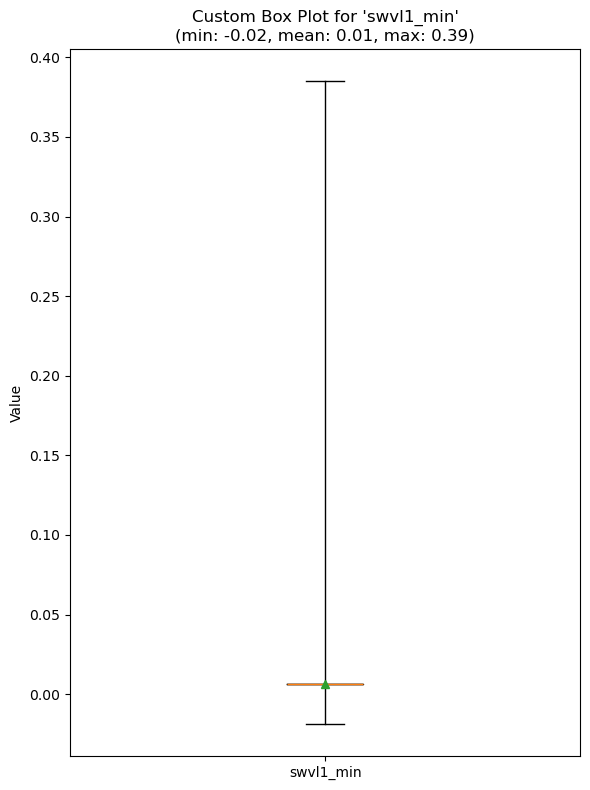

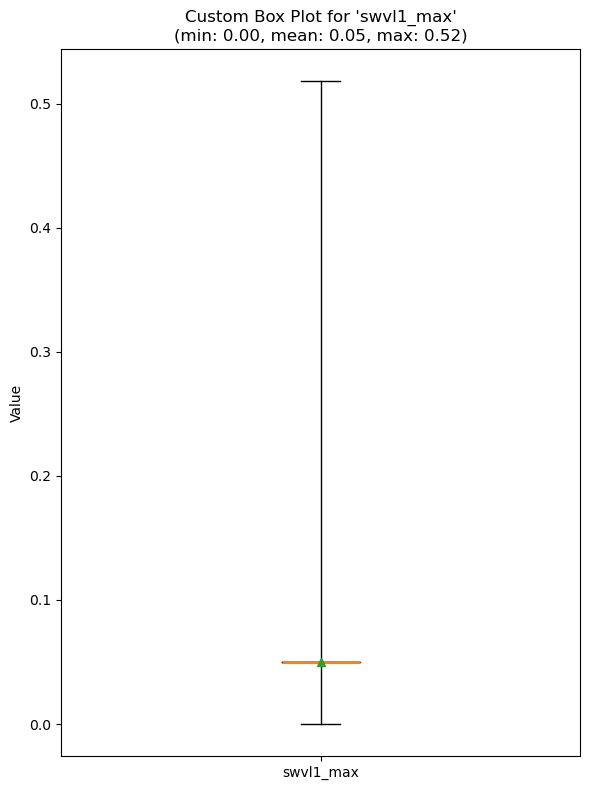

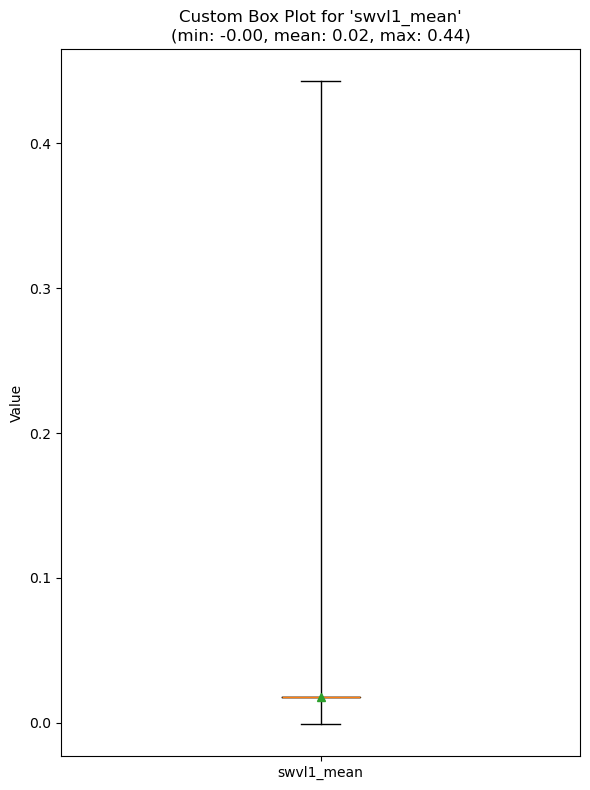

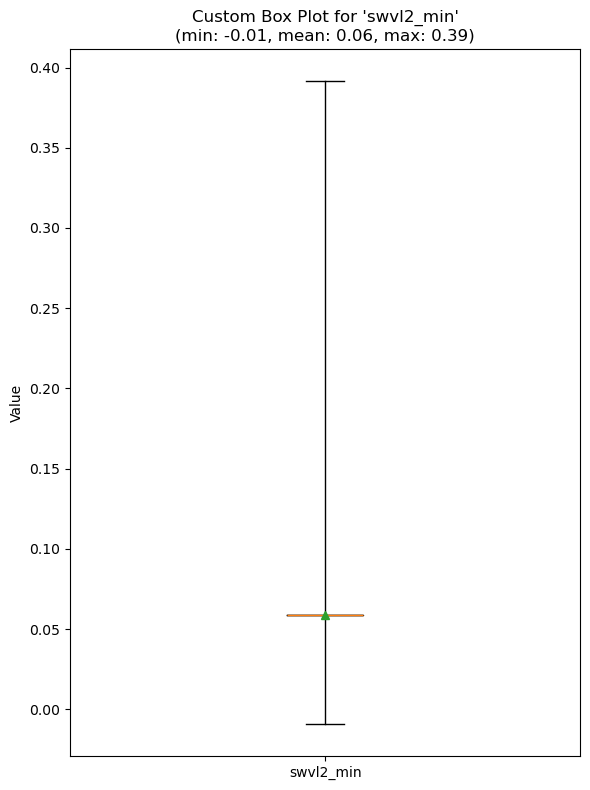

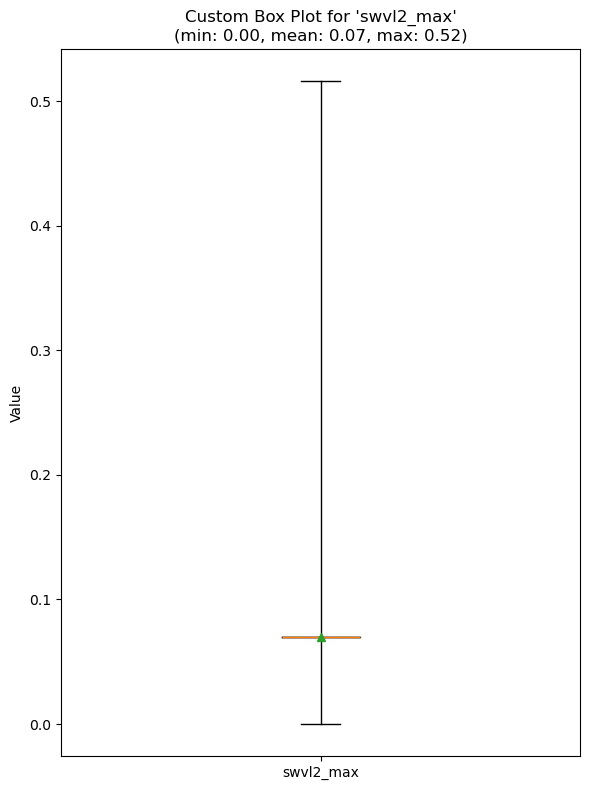

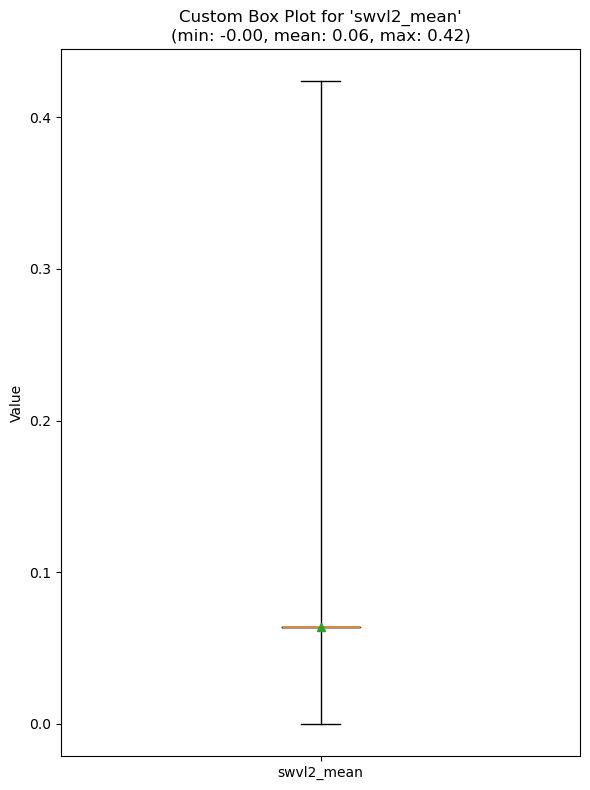

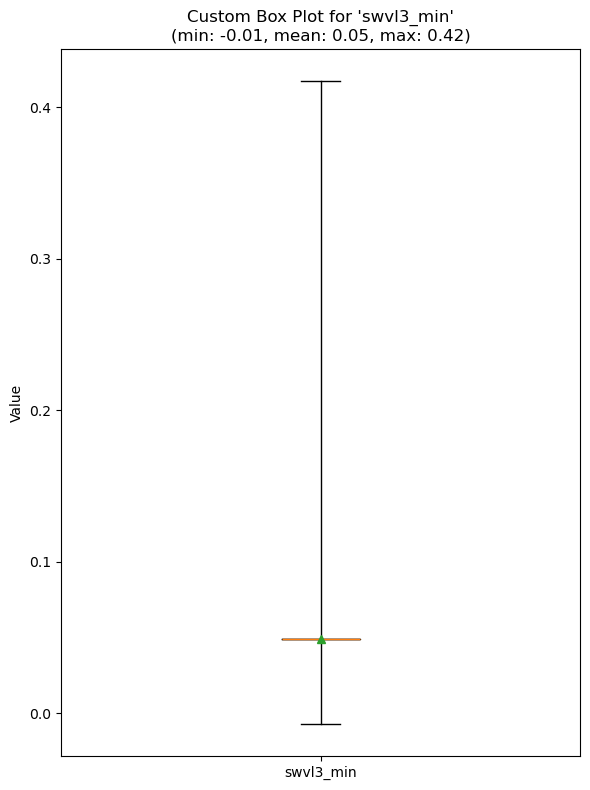

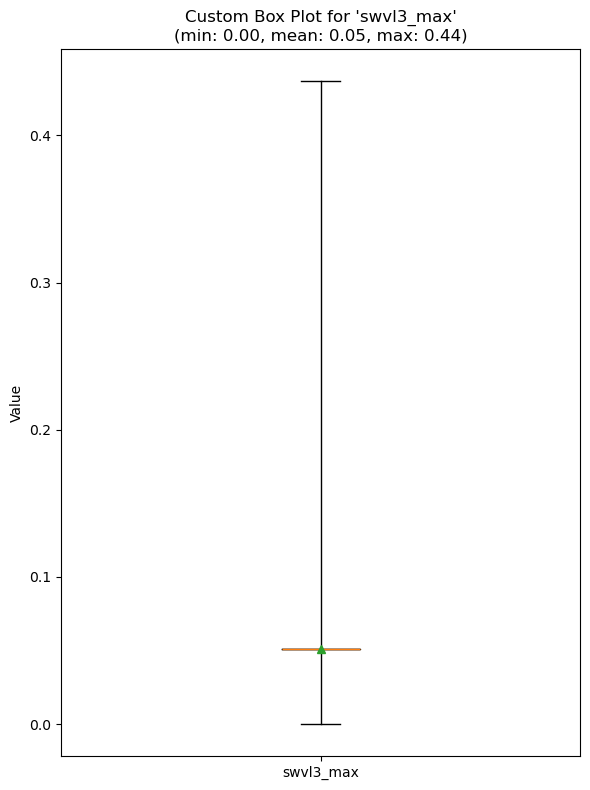

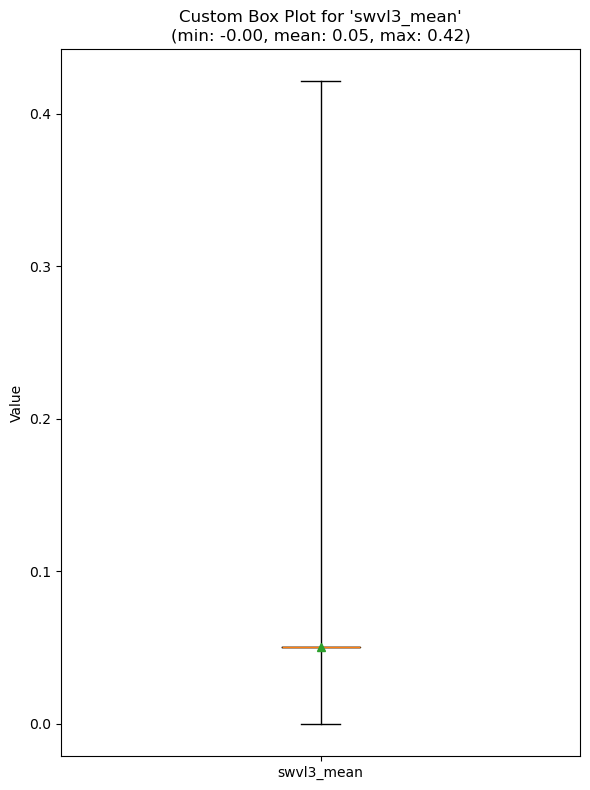

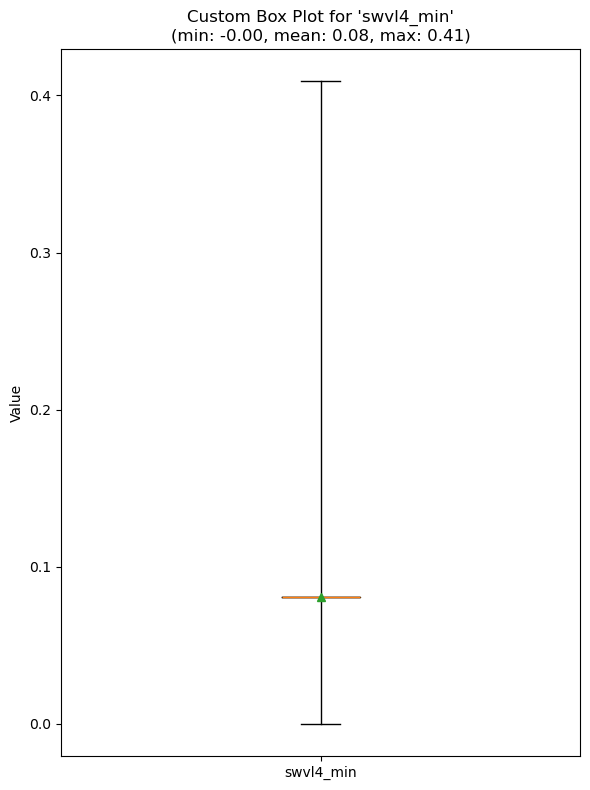

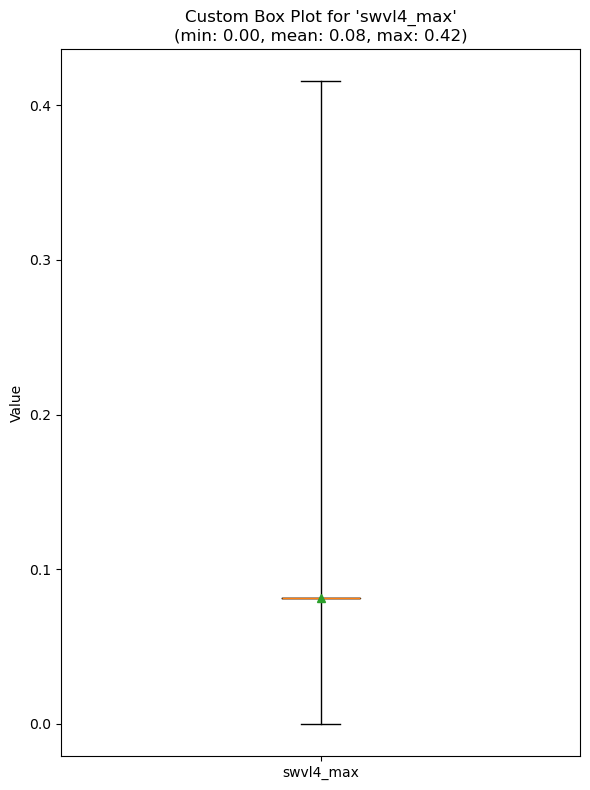

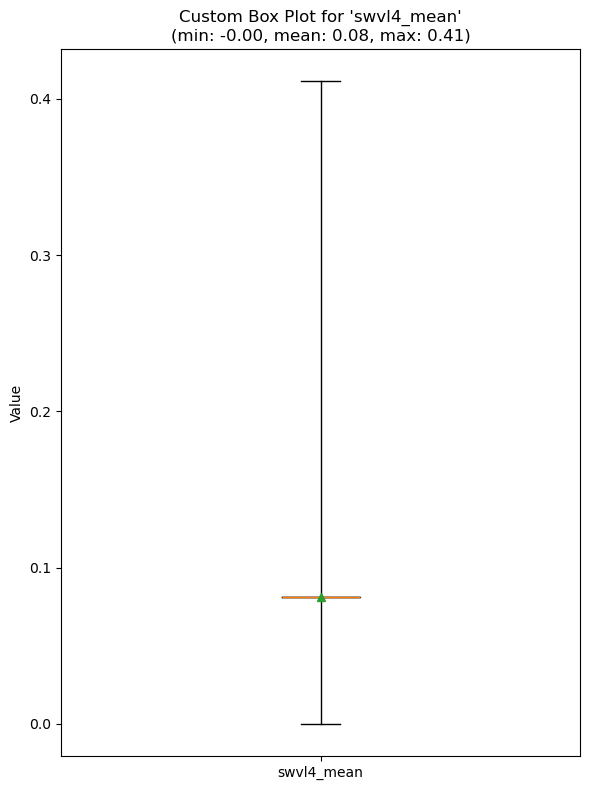

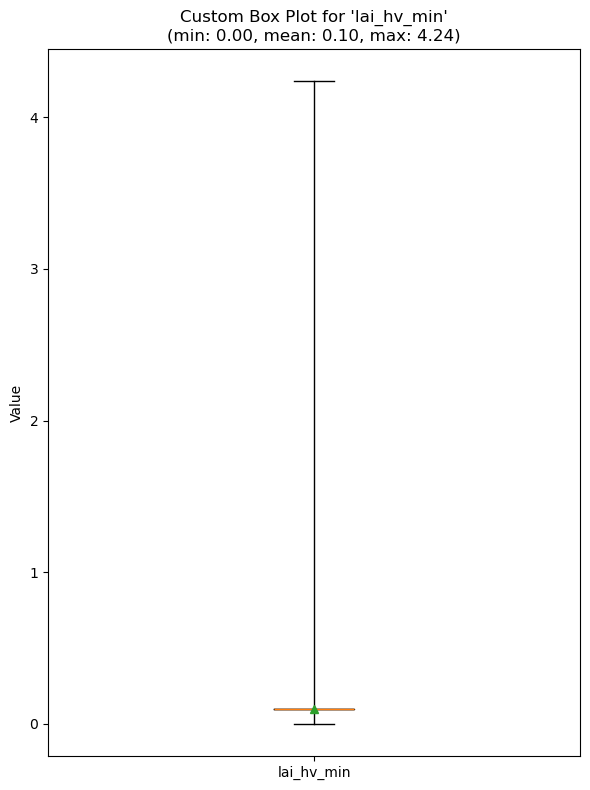

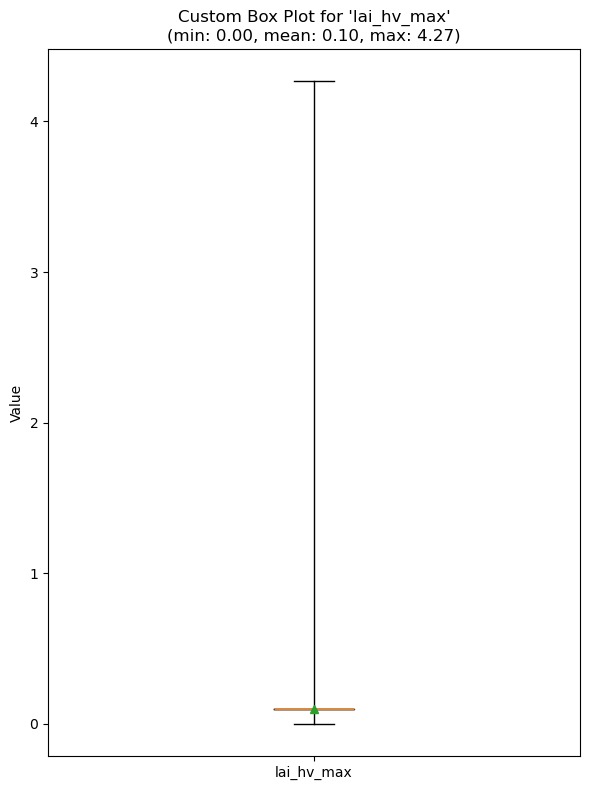

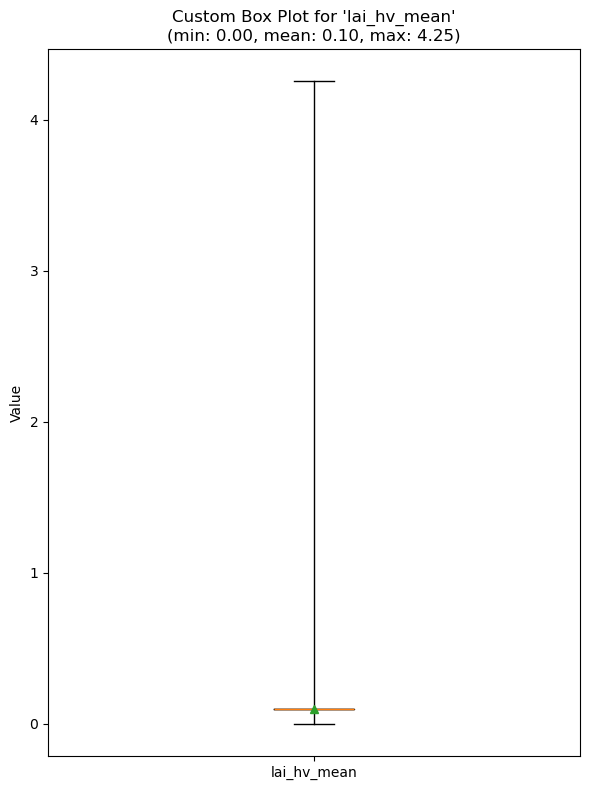

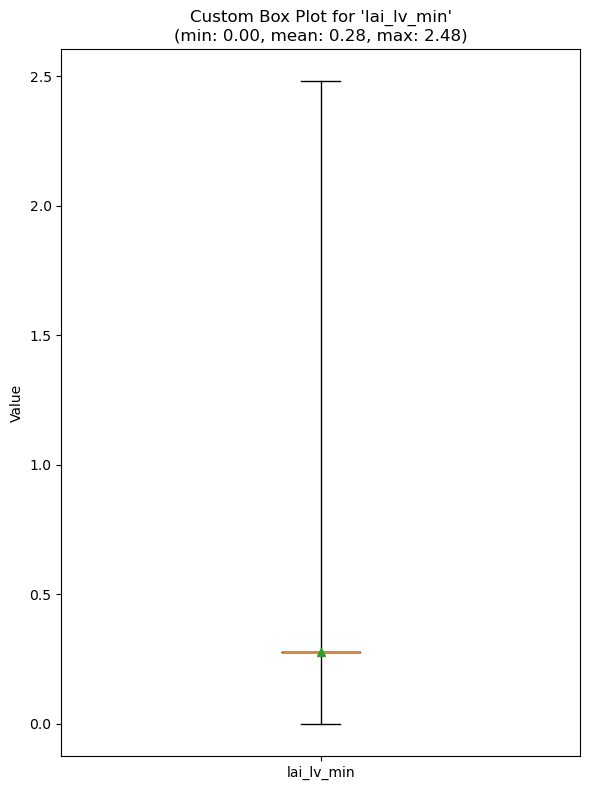

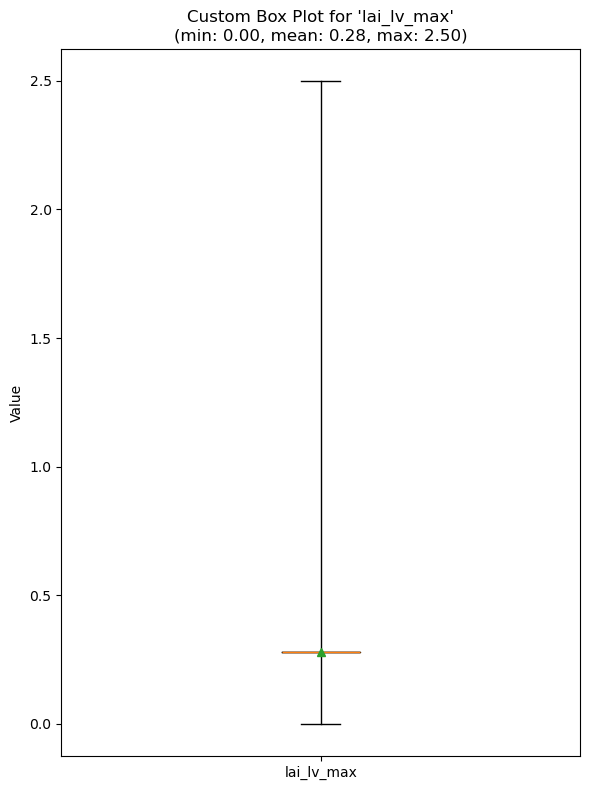

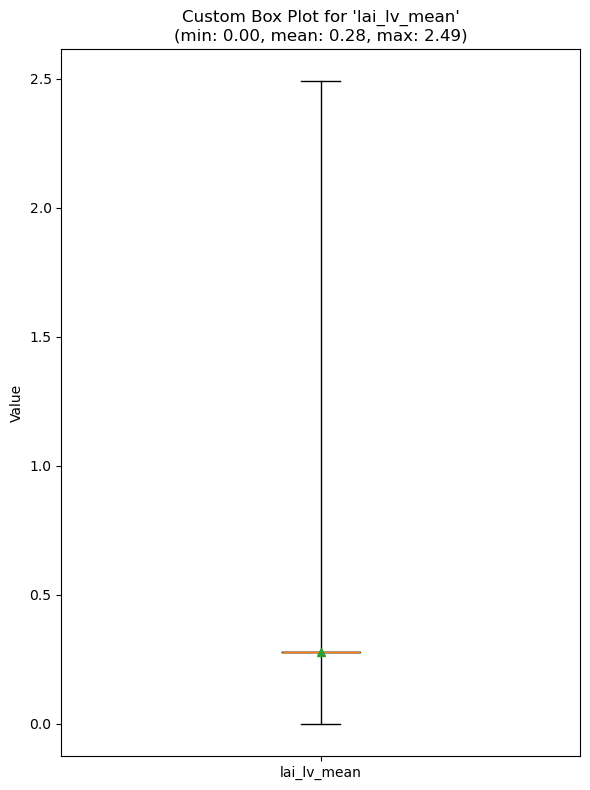

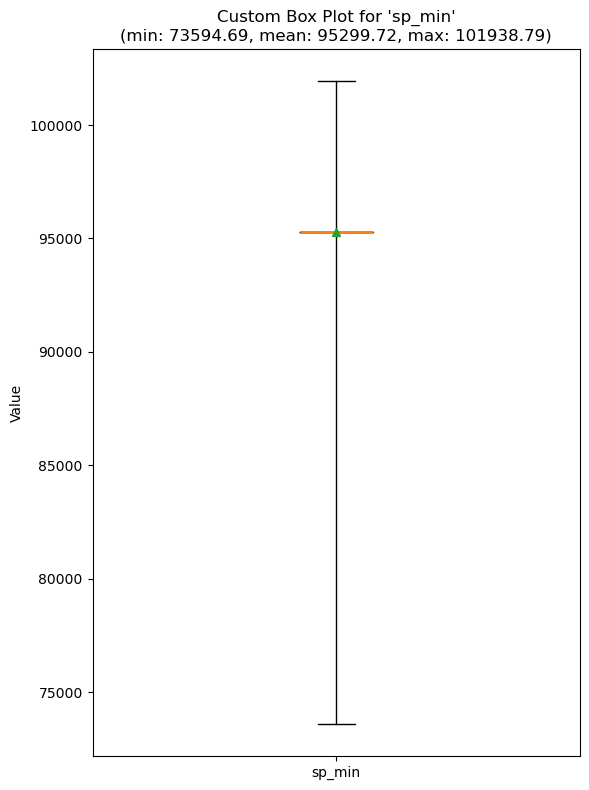

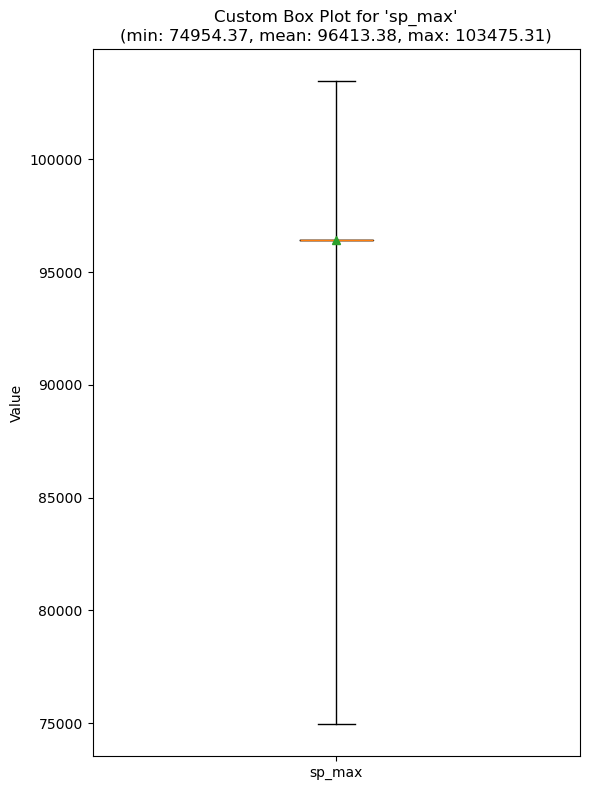

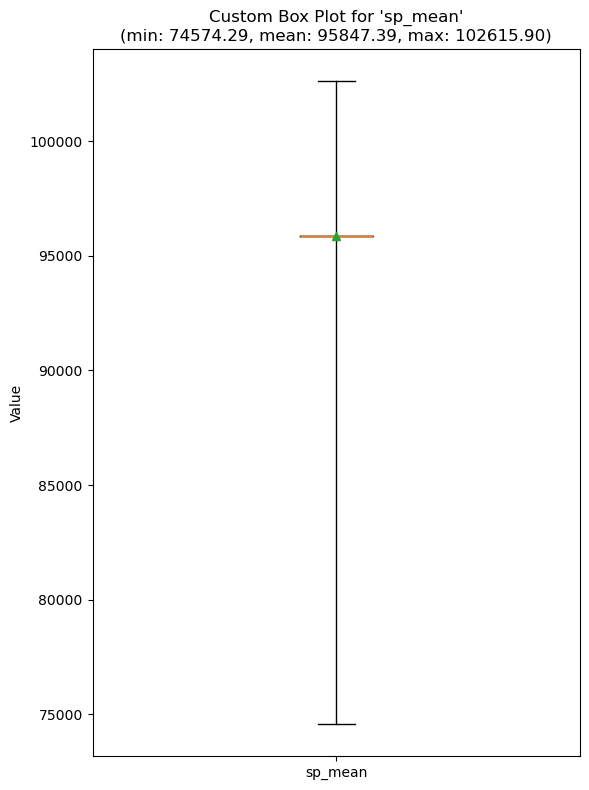

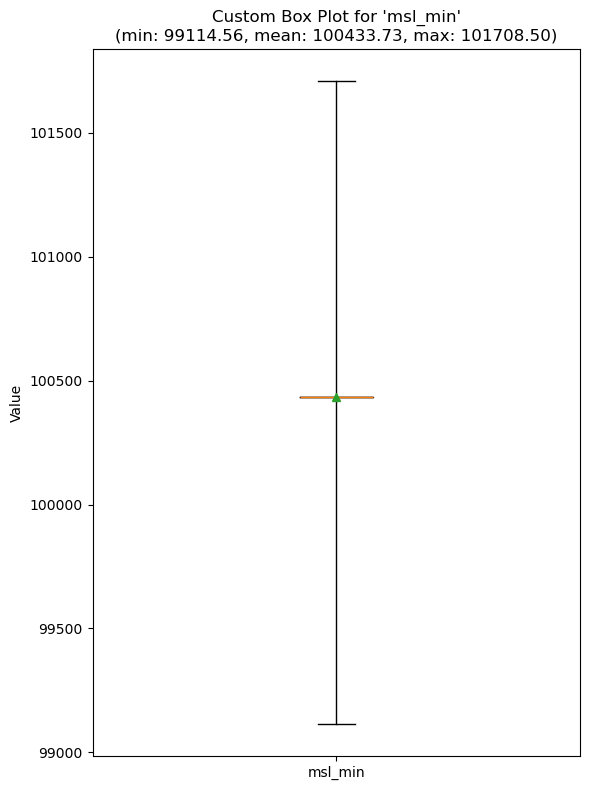

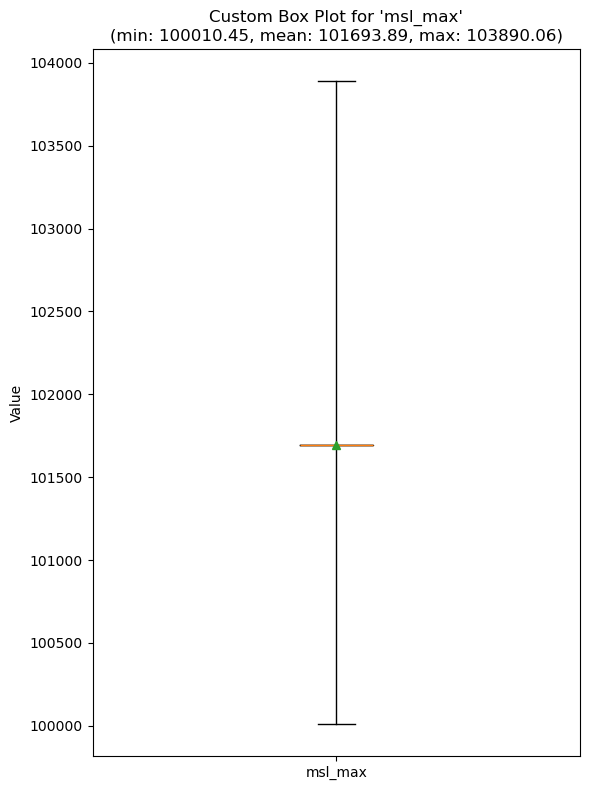

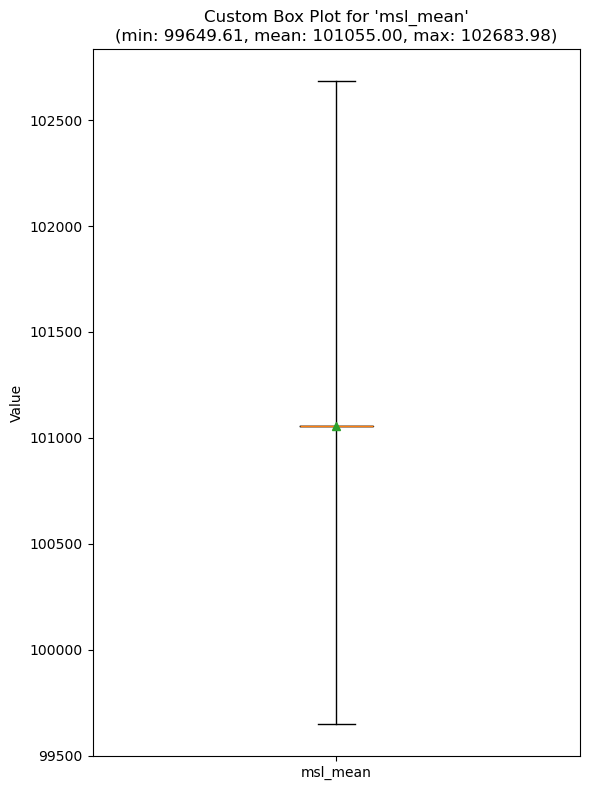

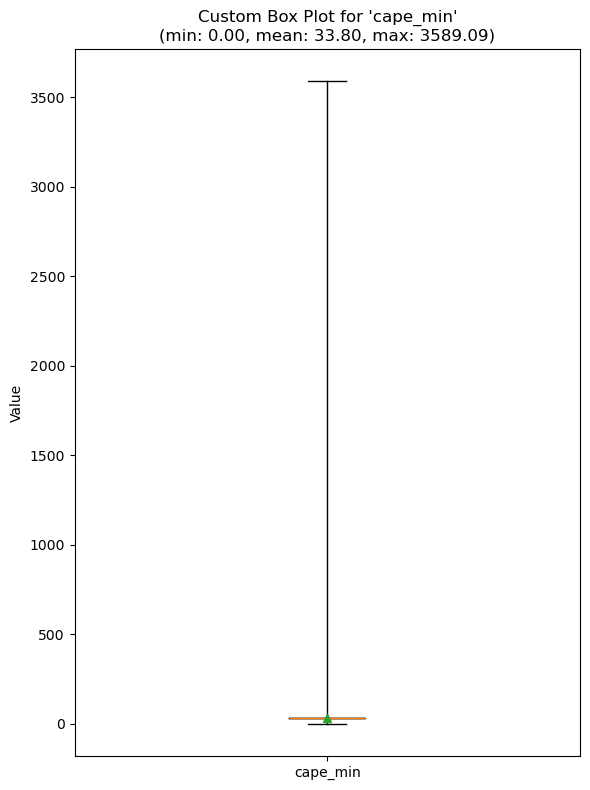

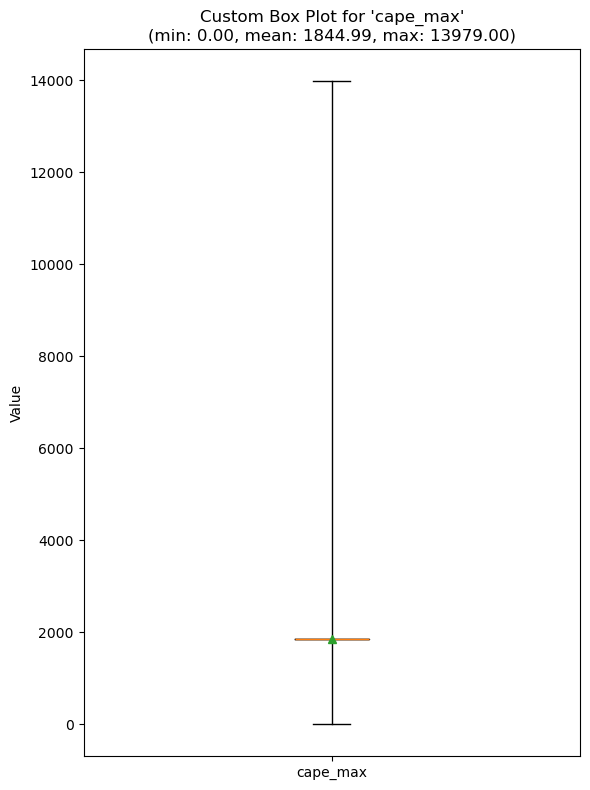

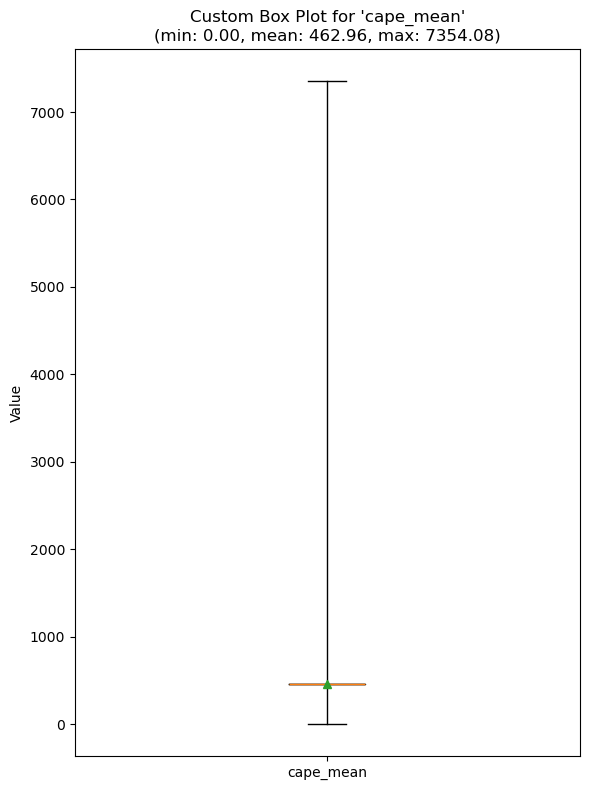

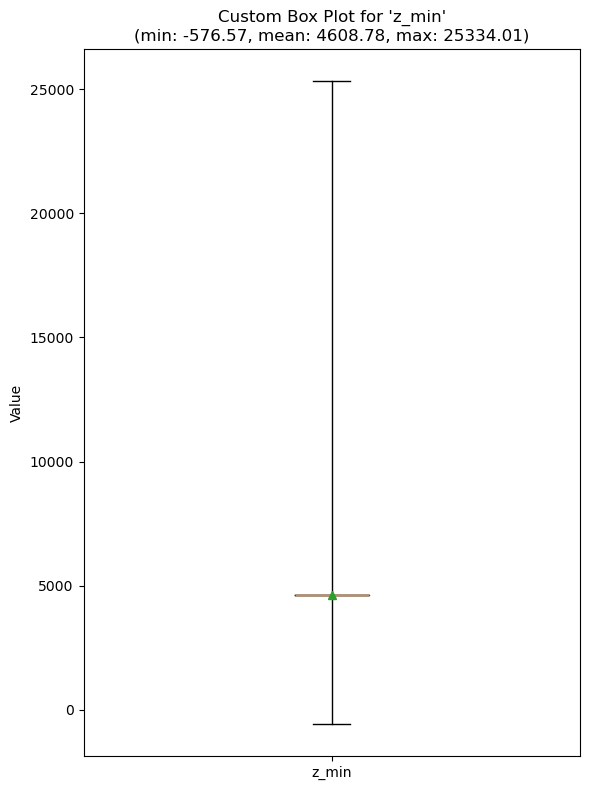

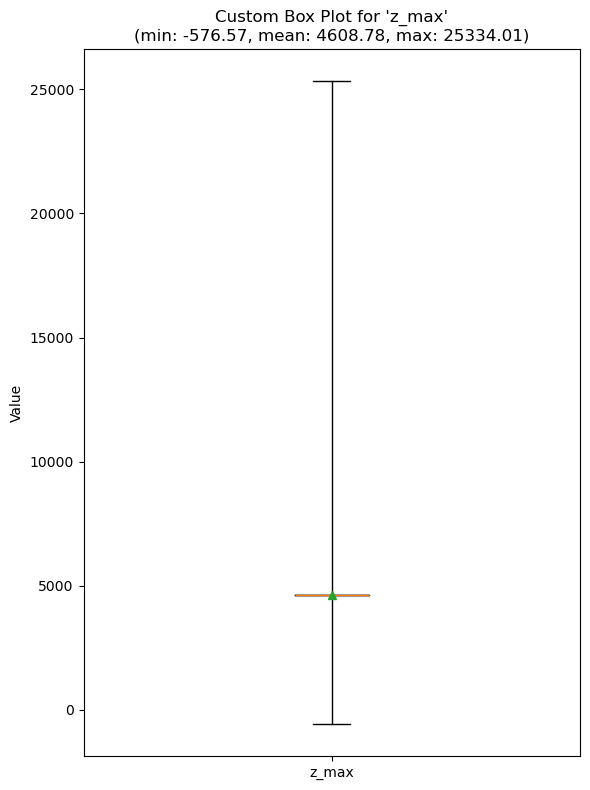

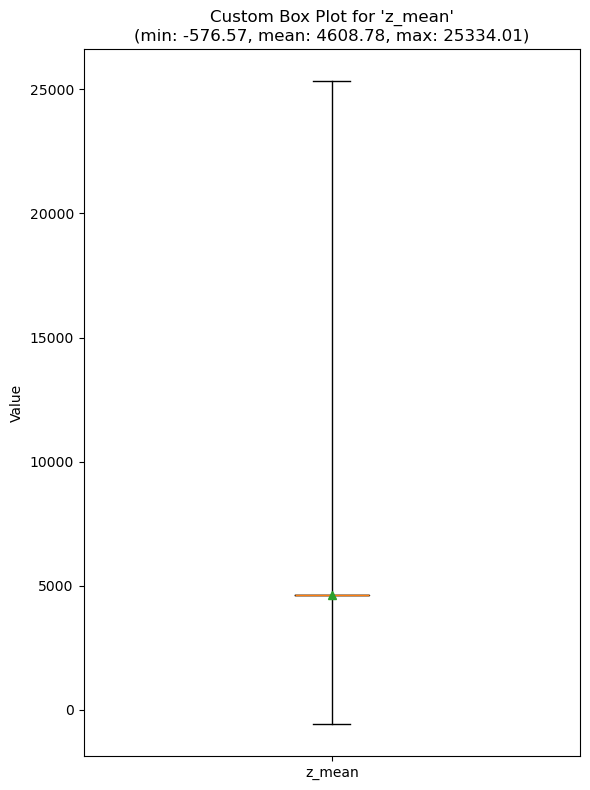

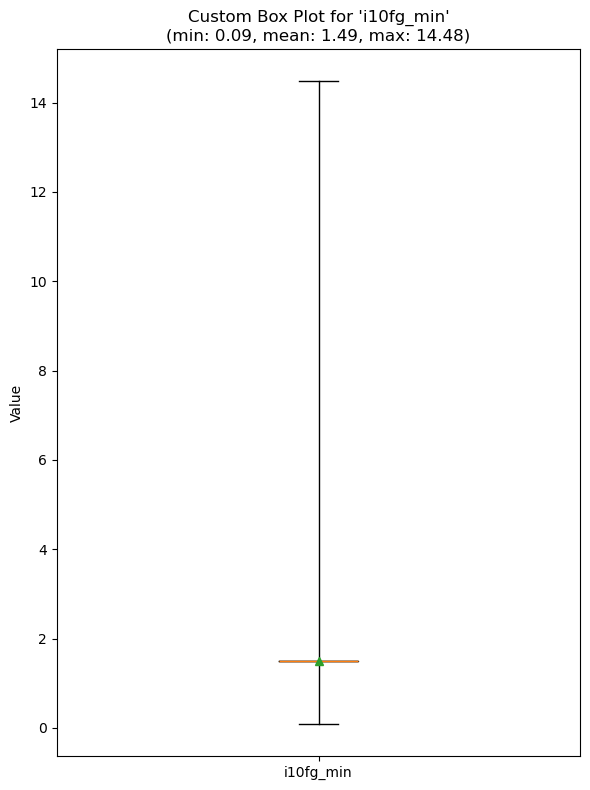

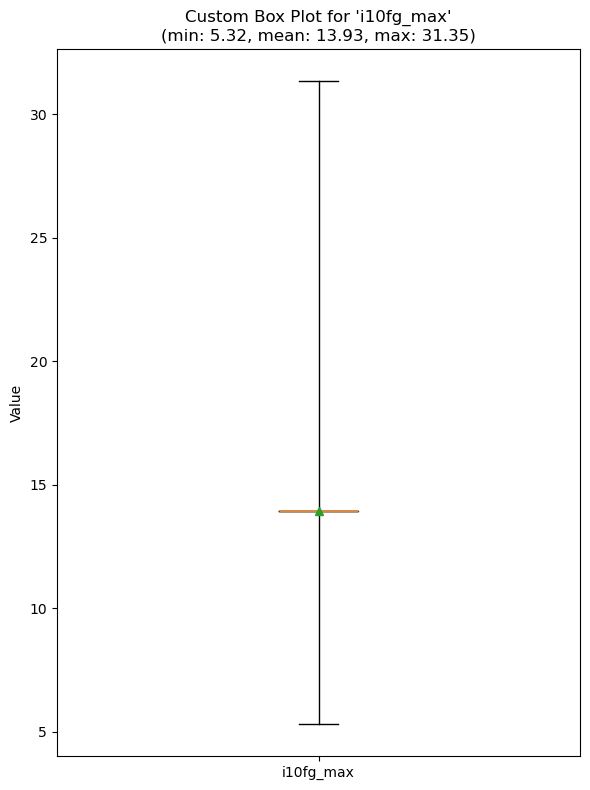

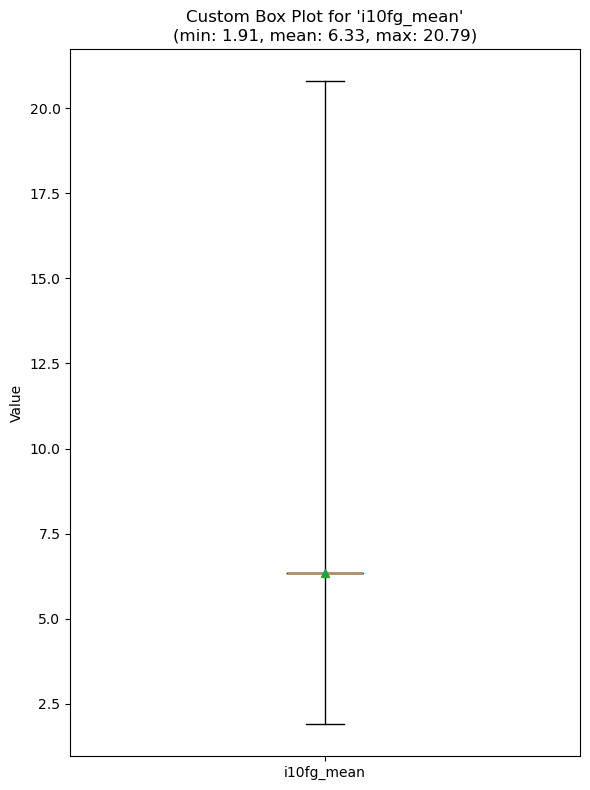

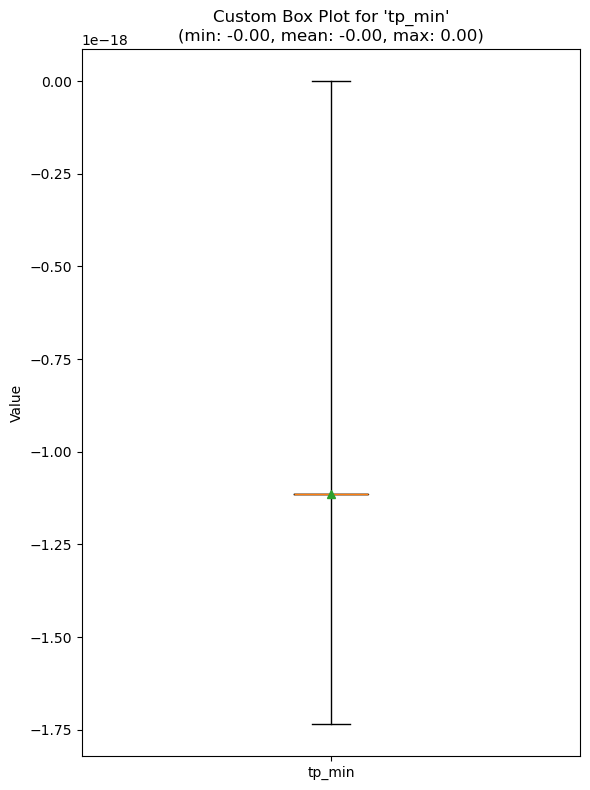

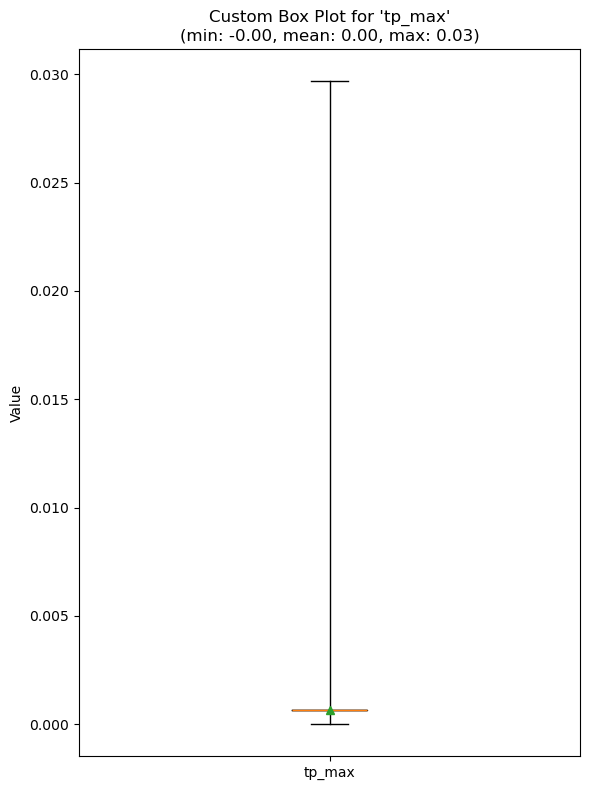

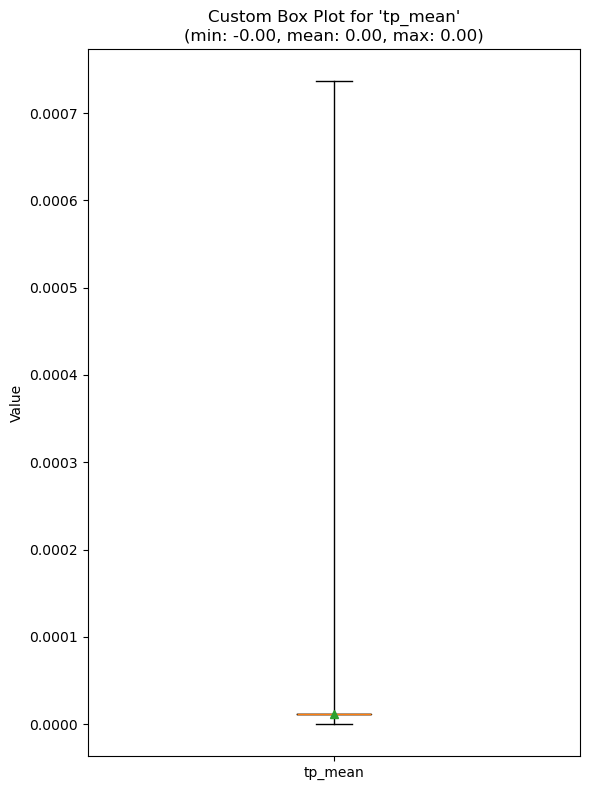

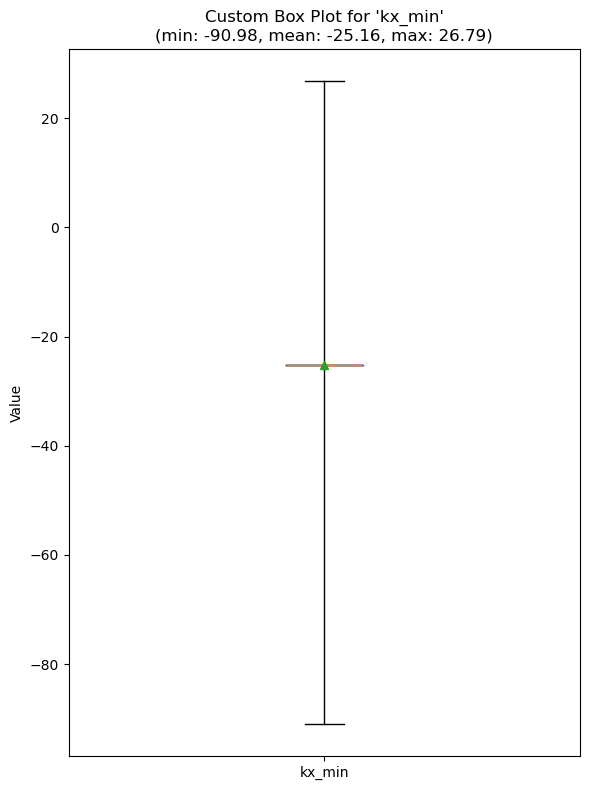

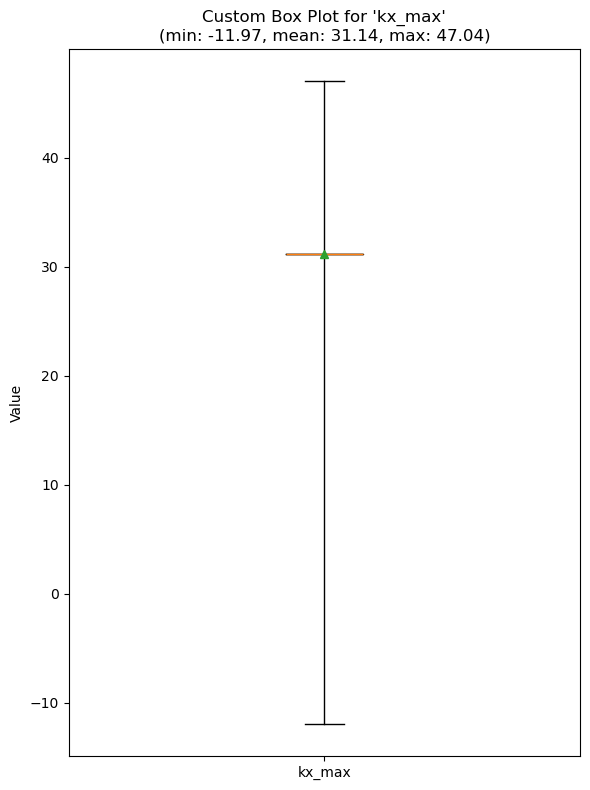

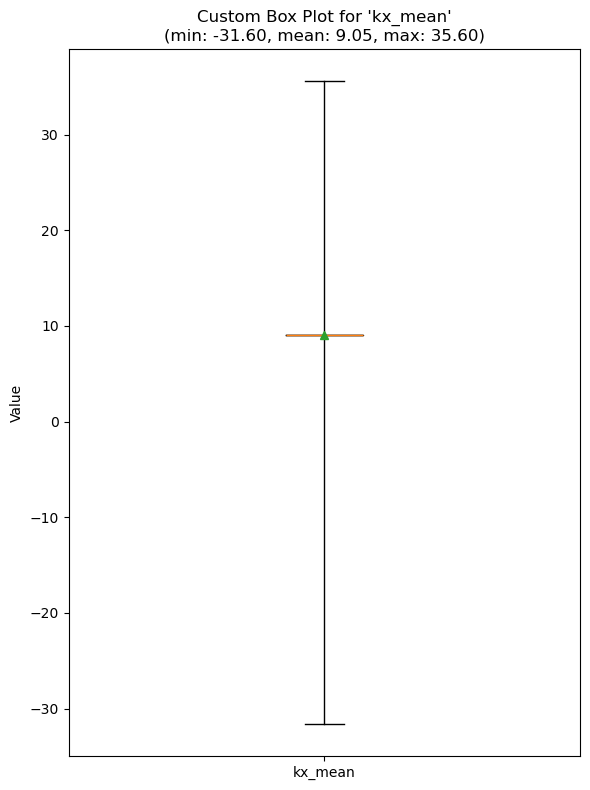

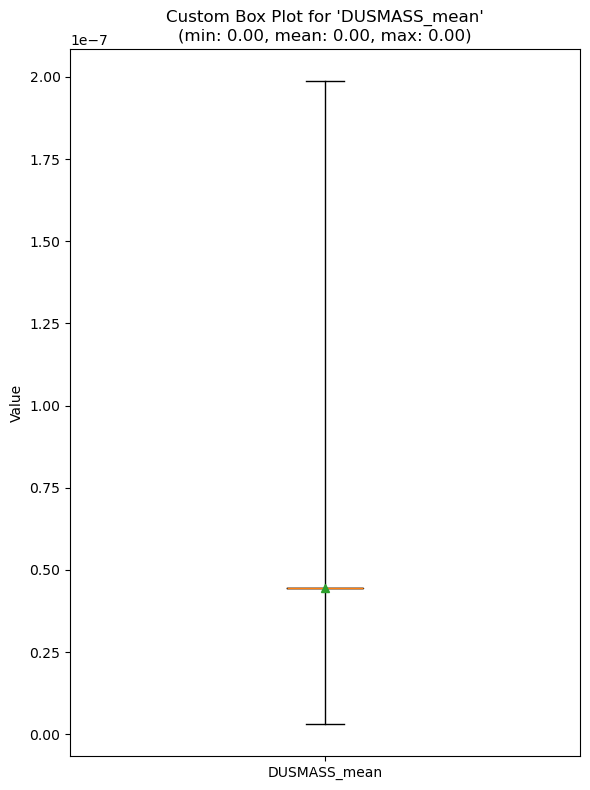

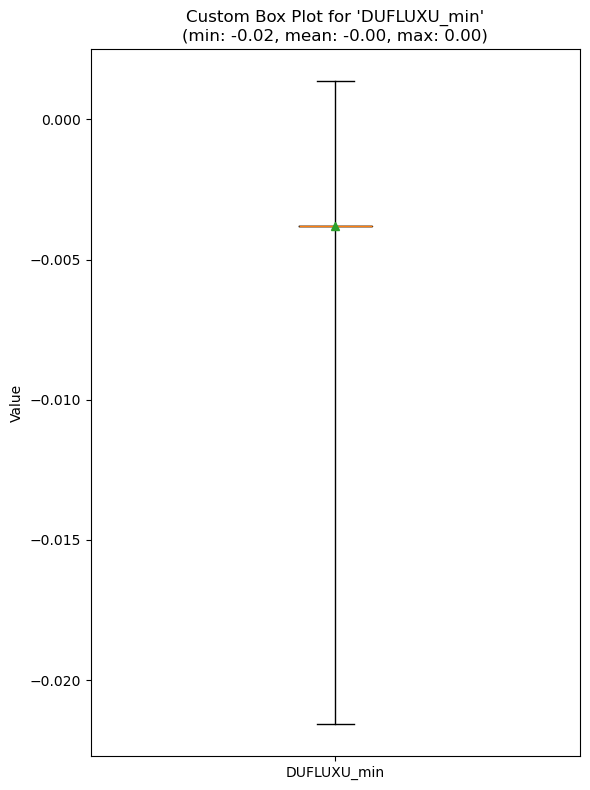

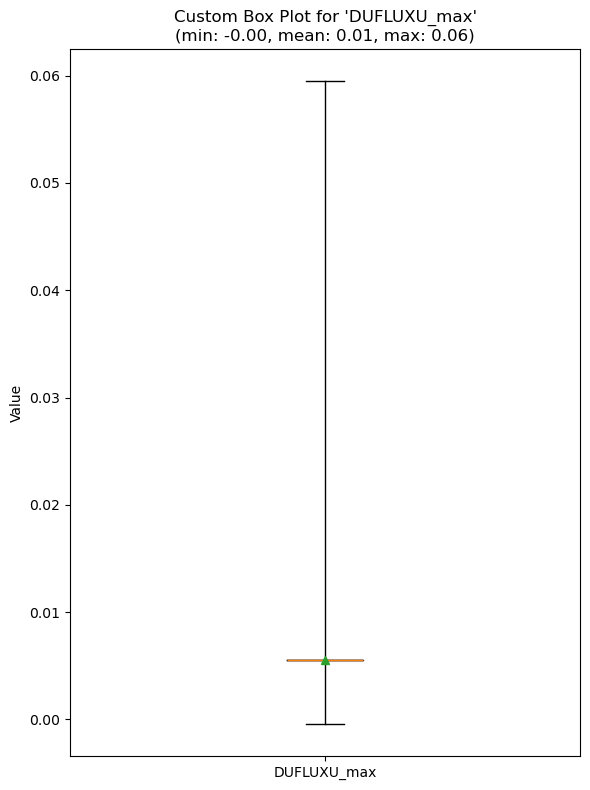

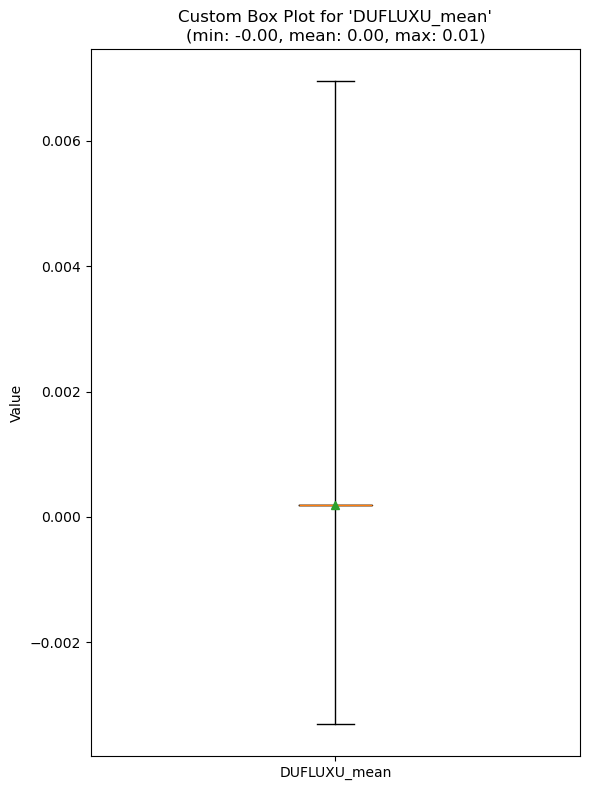

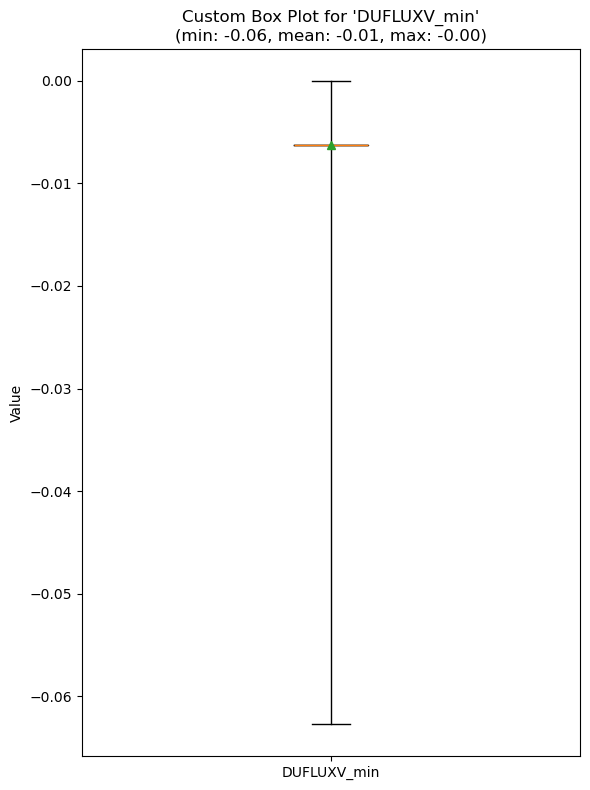

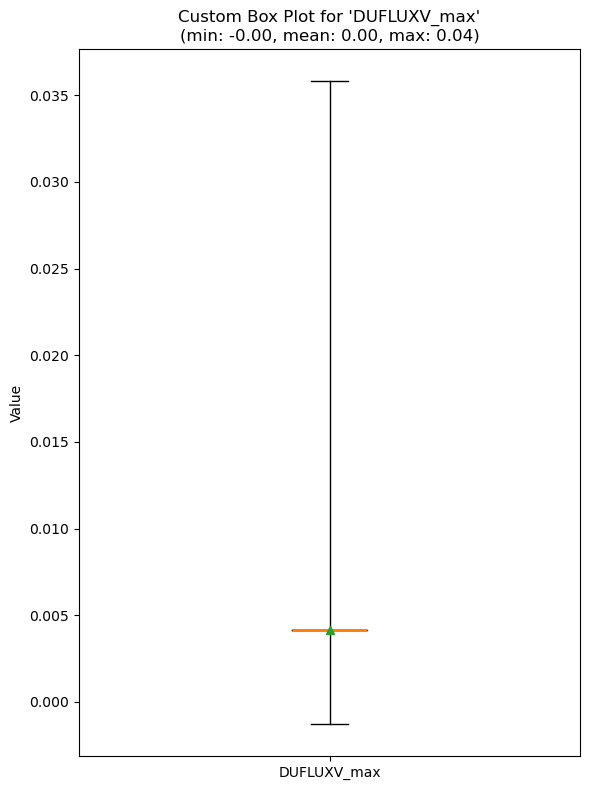

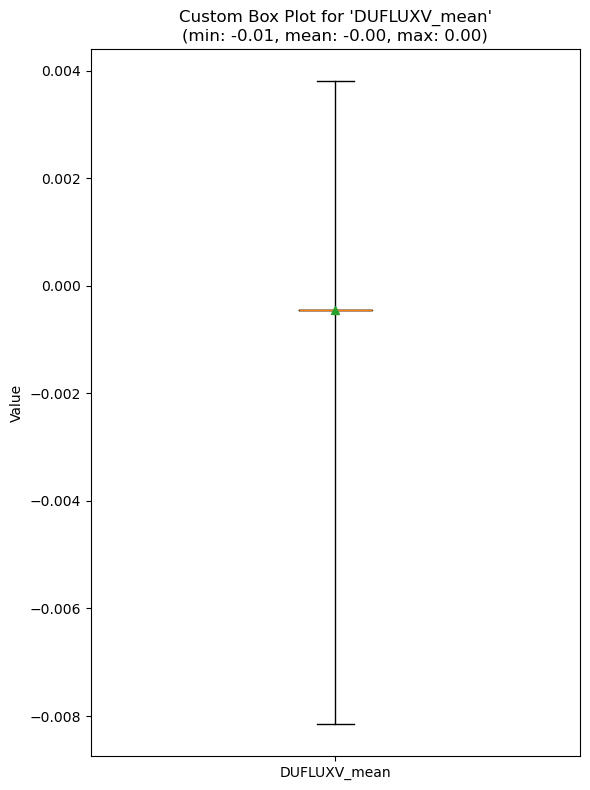

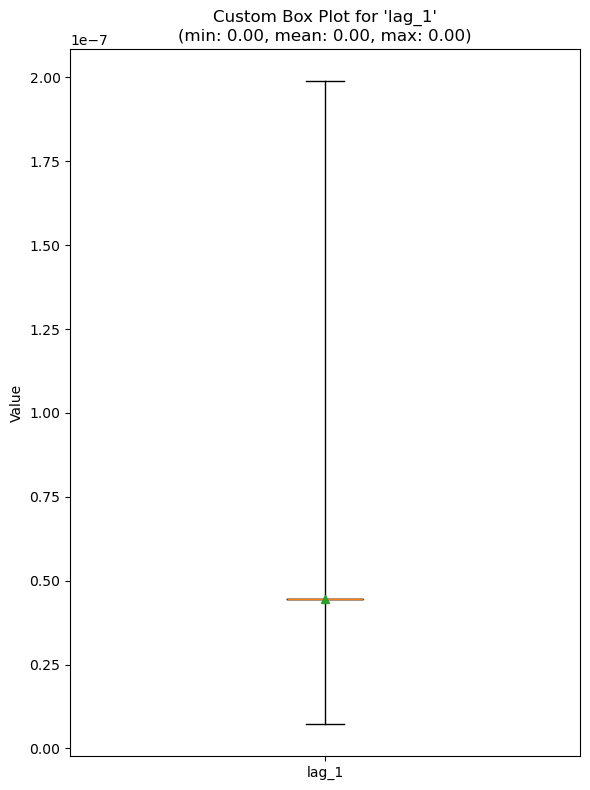

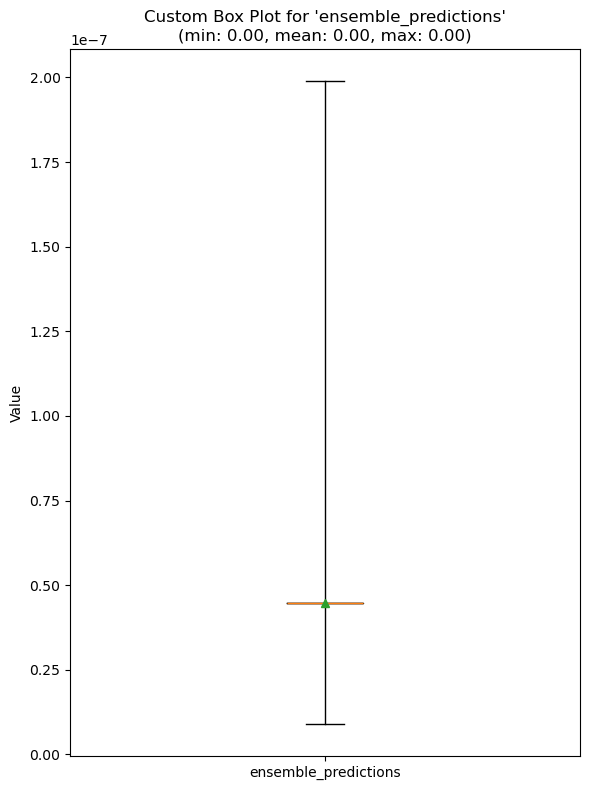

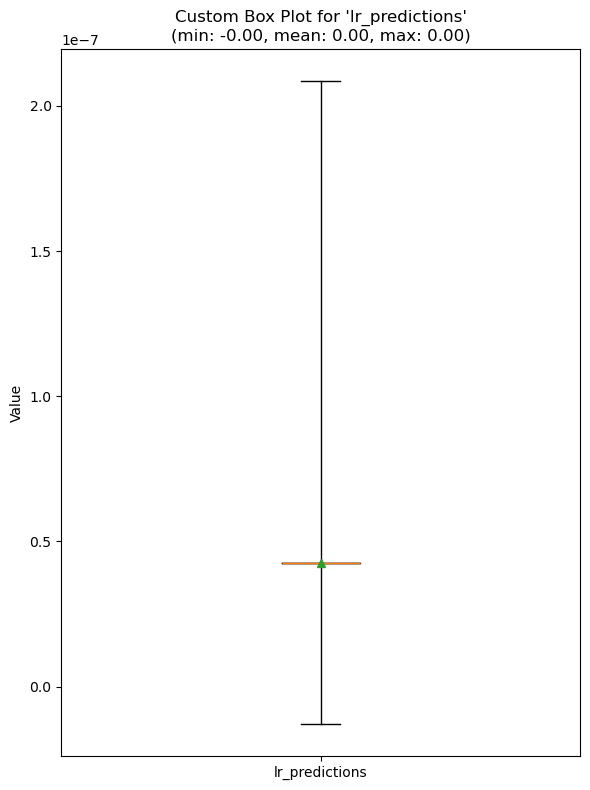

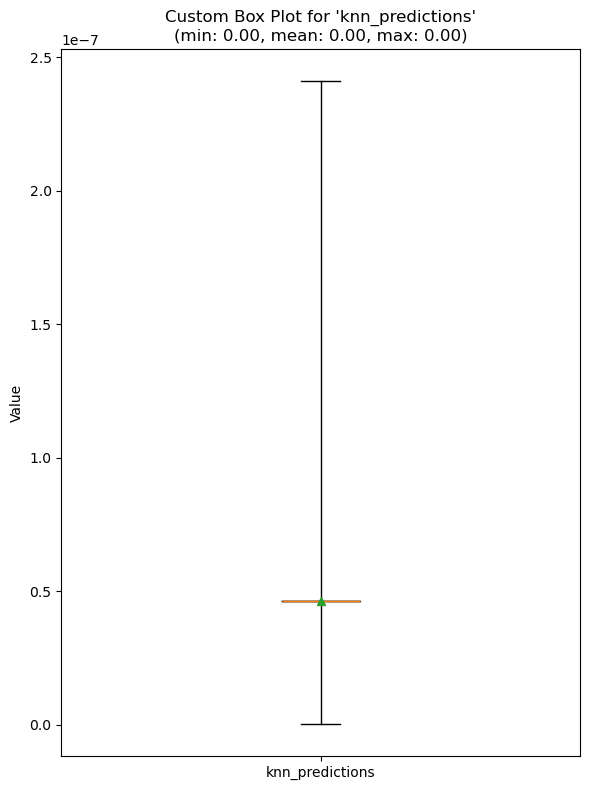

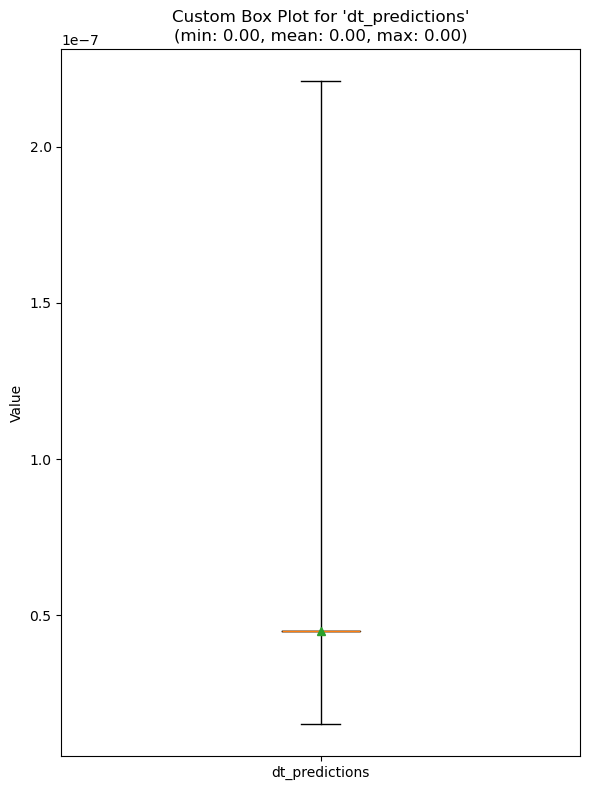

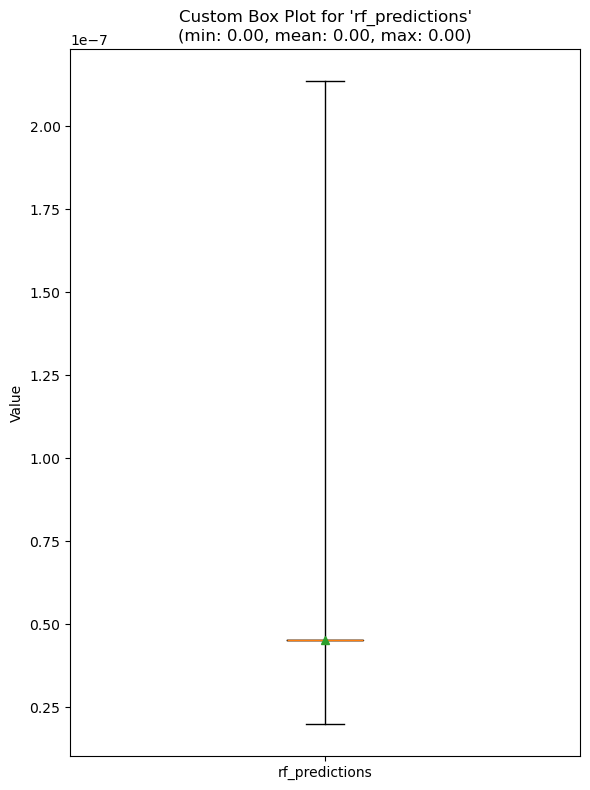

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Read the CSV file and clean data
# -------------------------------
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"
df = pd.read_csv(file_path, delimiter=',')

# Remove any extra whitespace from column names
df.columns = df.columns.str.strip()

# Define the columns to exclude
cols_to_exclude = [
    'lon', 'lat', 'time', 'level',
    'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1',
    'Month', 'Country', 'h3_res_3', 'h3_res_4'
]
df.drop(columns=cols_to_exclude, inplace=True, errors='ignore')

# -------------------------------
# 2. Convert all remaining columns to numeric (if possible)
# -------------------------------
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 3. Loop through each column and produce a custom box plot
# -------------------------------
for col in df.columns:
    # Drop any NaN values for the column
    series = df[col].dropna()
    if series.empty:
        print(f"Column '{col}' has no numeric data; skipping.")
        continue

    # Compute custom statistics:
    # - 'whislo' is the minimum value (bottom whisker)
    # - 'whishi' is the maximum value (top whisker)
    # - 'med', 'q1', and 'q3' are all set to the mean (so the box is simply a line)
    col_min = series.min()
    col_mean = series.mean()
    col_max = series.max()

    box_stats = [{
        'mean':   col_mean,   # marker for the mean (if showmeans=True)
        'med':    col_mean,   # using mean as the "median" line
        'q1':     col_mean,
        'q3':     col_mean,
        'whislo': col_min,    # bottom whisker (minimum)
        'whishi': col_max,    # top whisker (maximum)
        'fliers': []          # no outliers shown
    }]

    # Create a new figure for each column
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.bxp(box_stats, showmeans=True, meanline=False)
    ax.set_xticklabels([col])
    ax.set_ylabel('Value')
    ax.set_title(f"Box Plot for '{col}'\n(min: {col_min:.2f}, mean: {col_mean:.2f}, max: {col_max:.2f})")
    plt.tight_layout()
    plt.show()


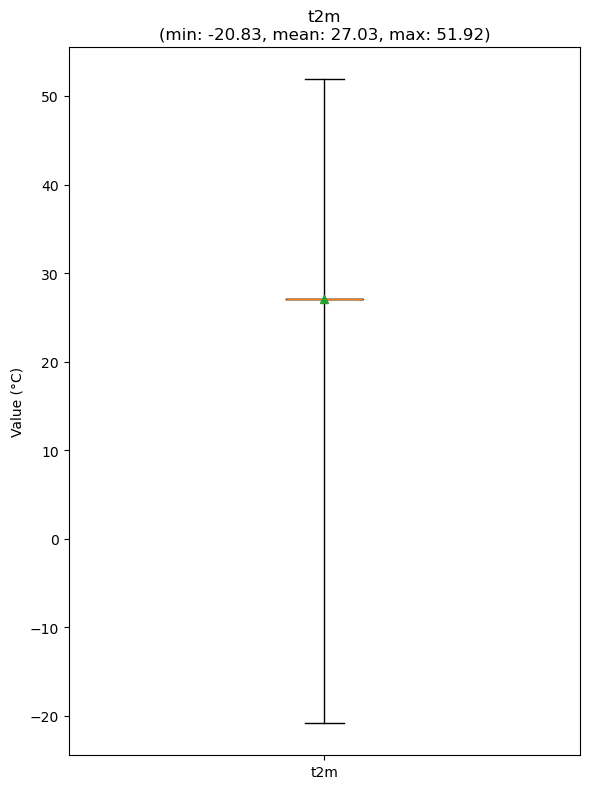

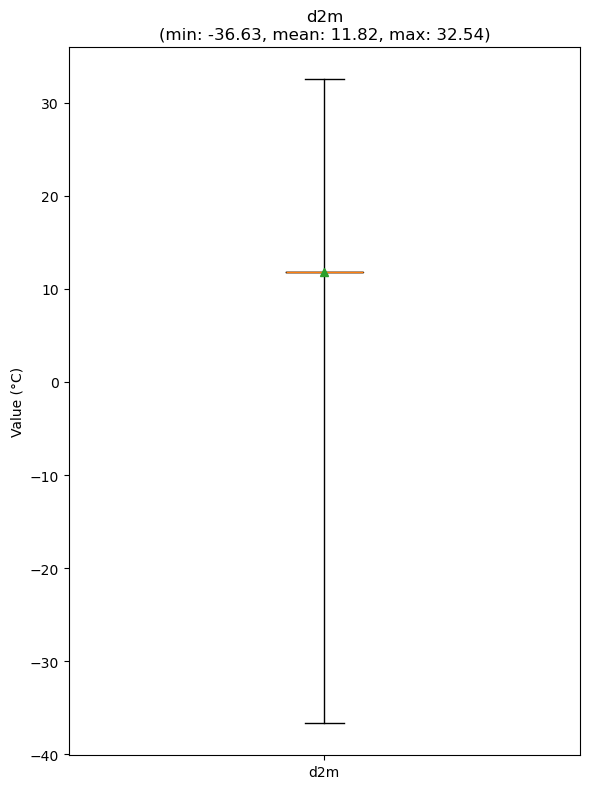

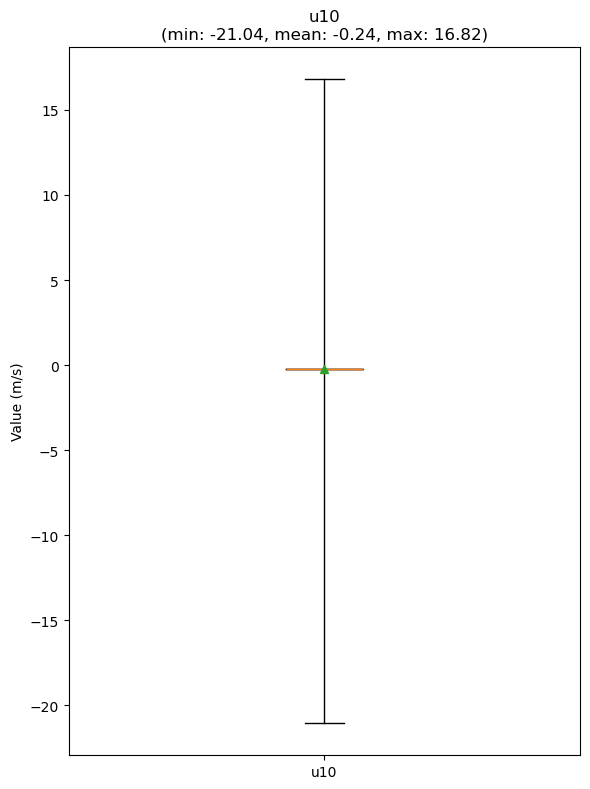

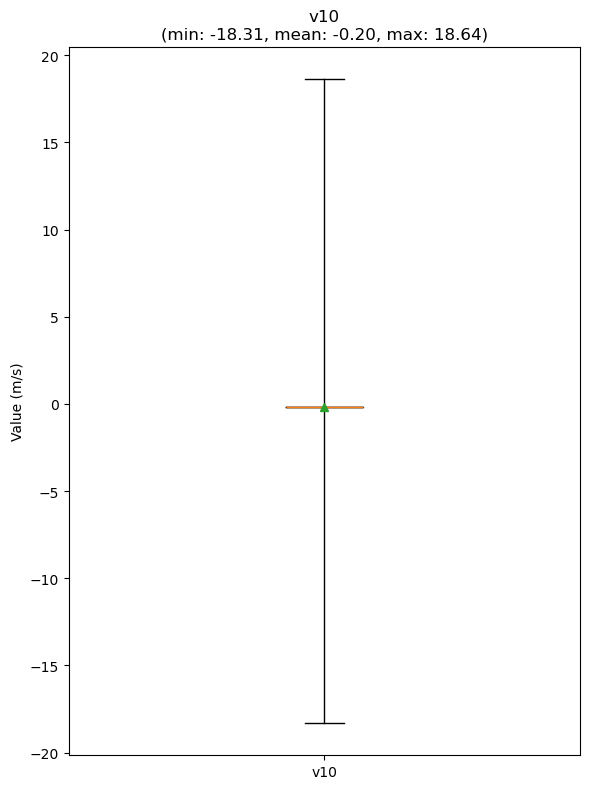

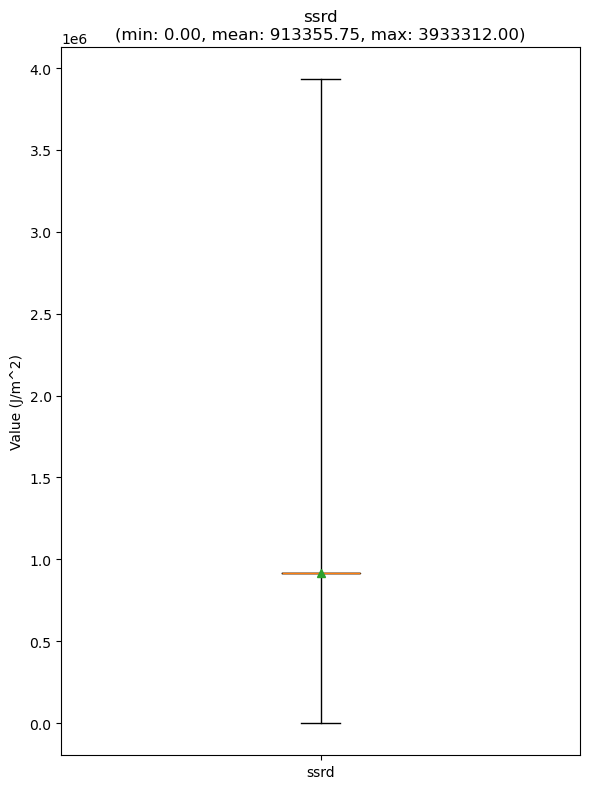

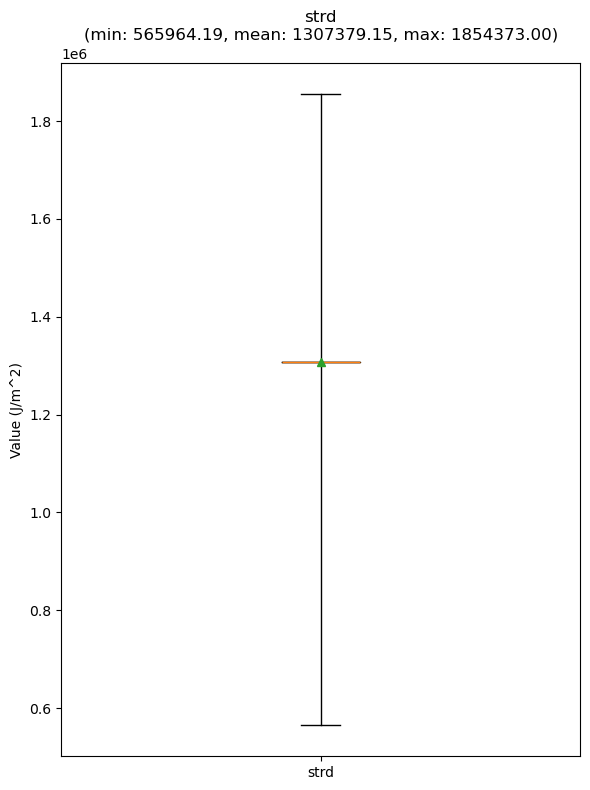

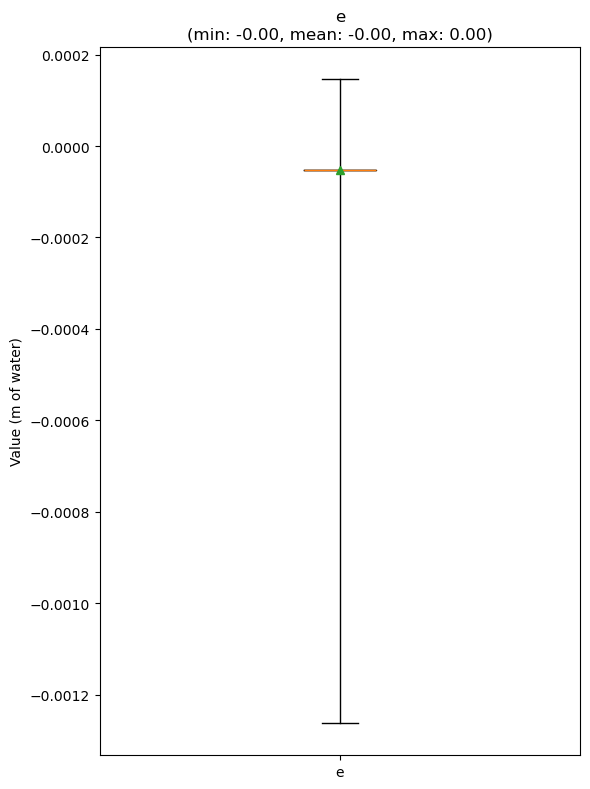

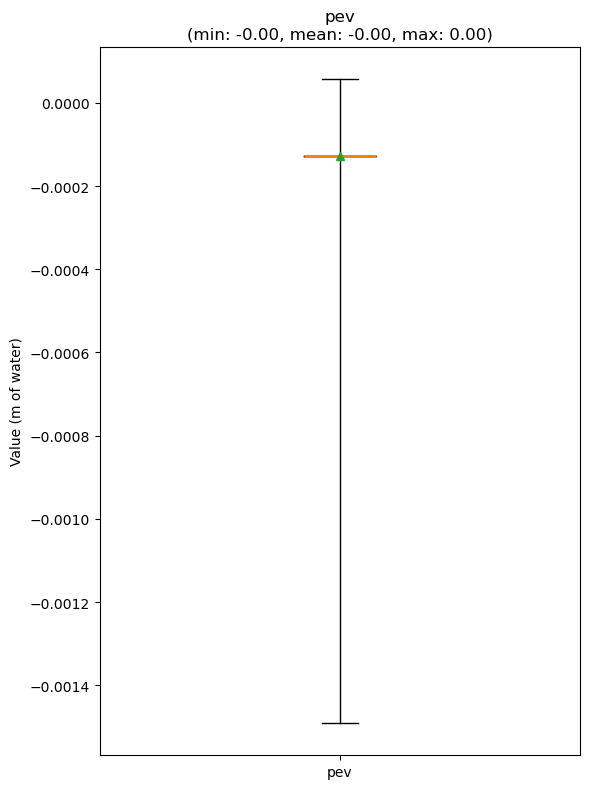

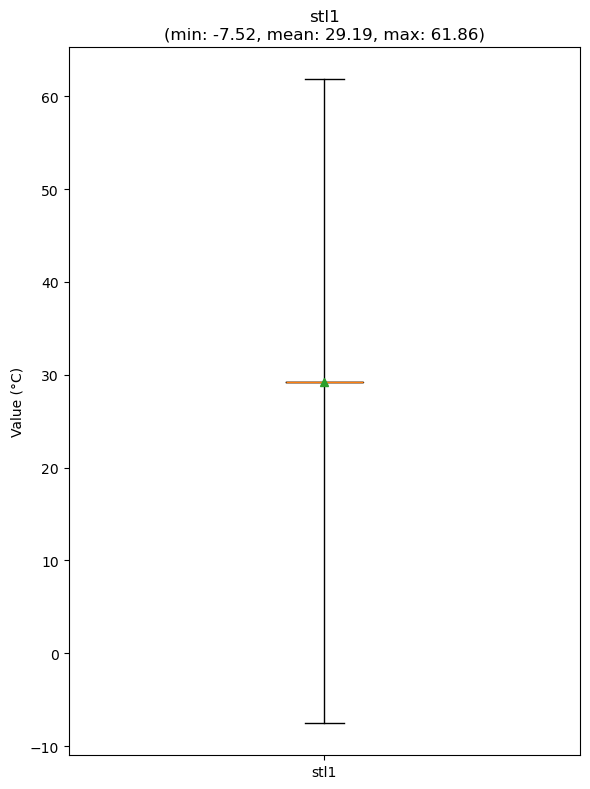

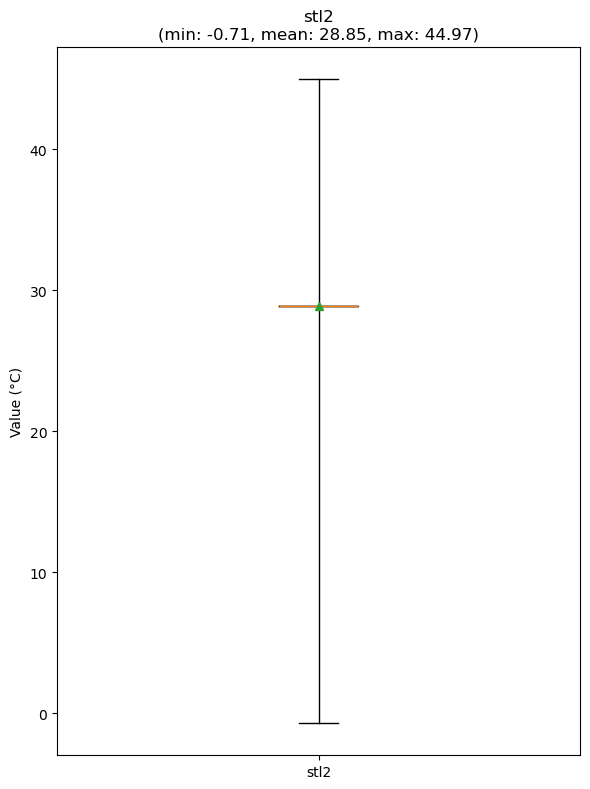

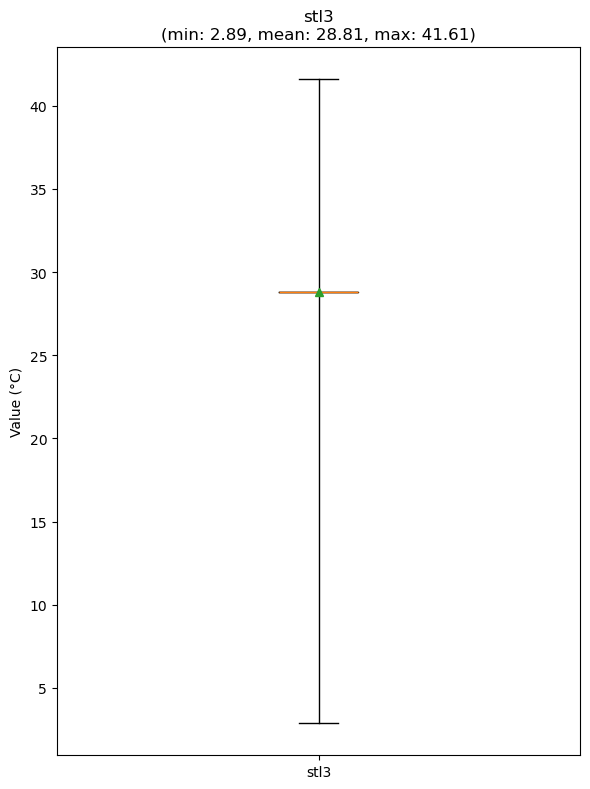

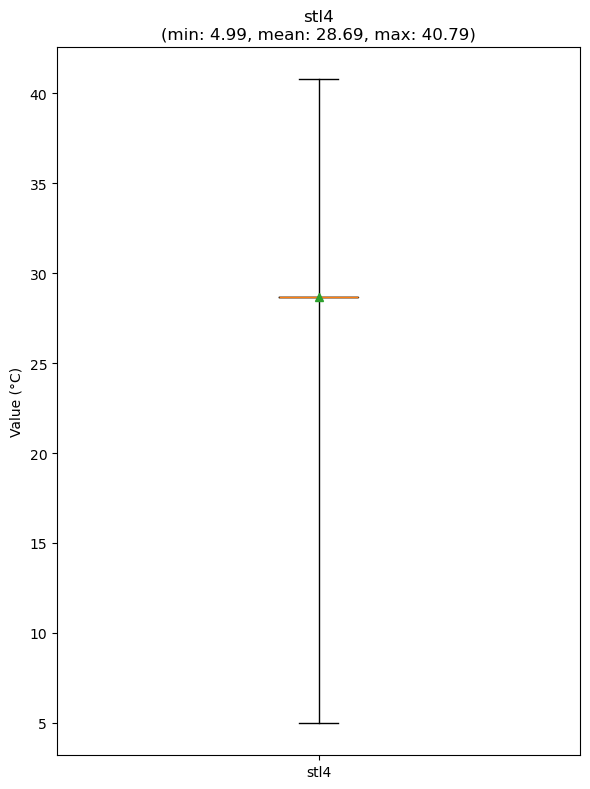

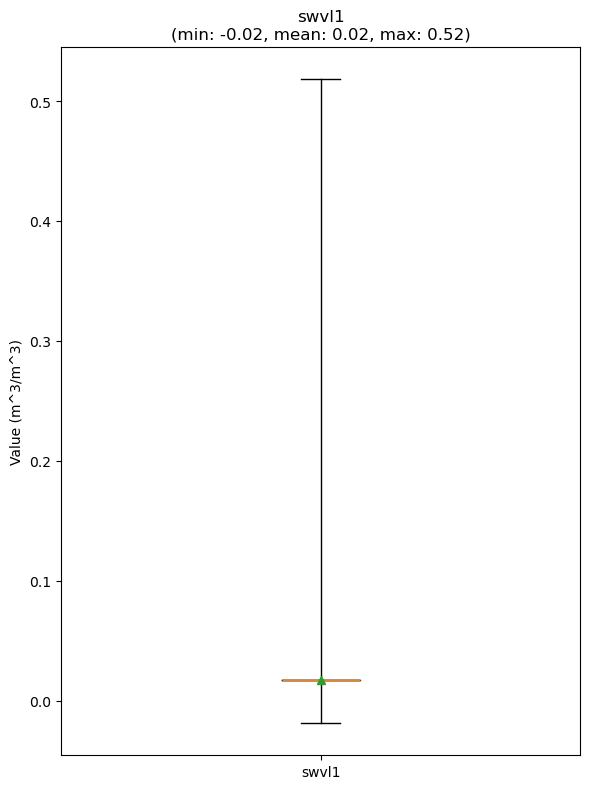

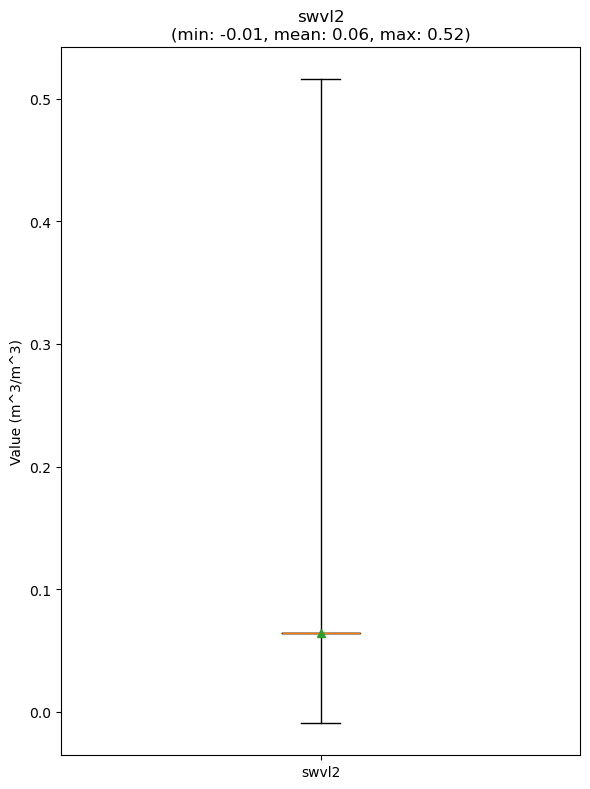

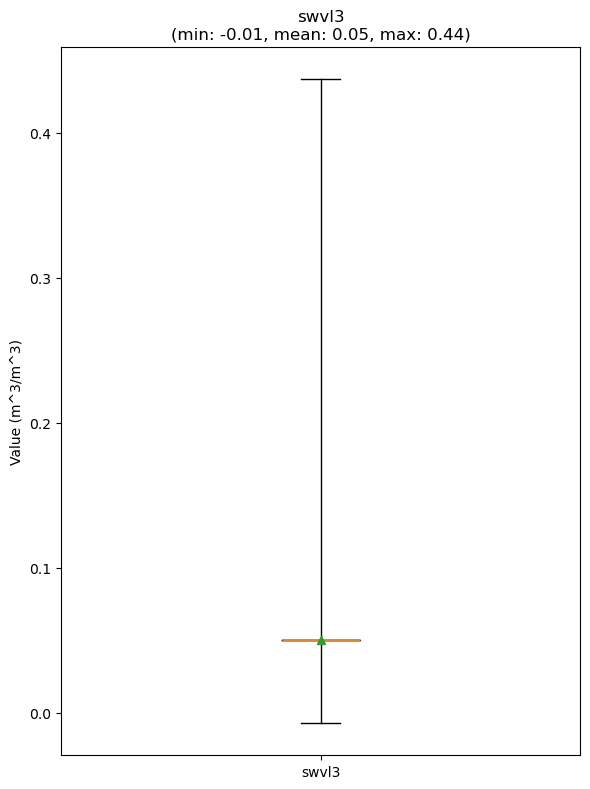

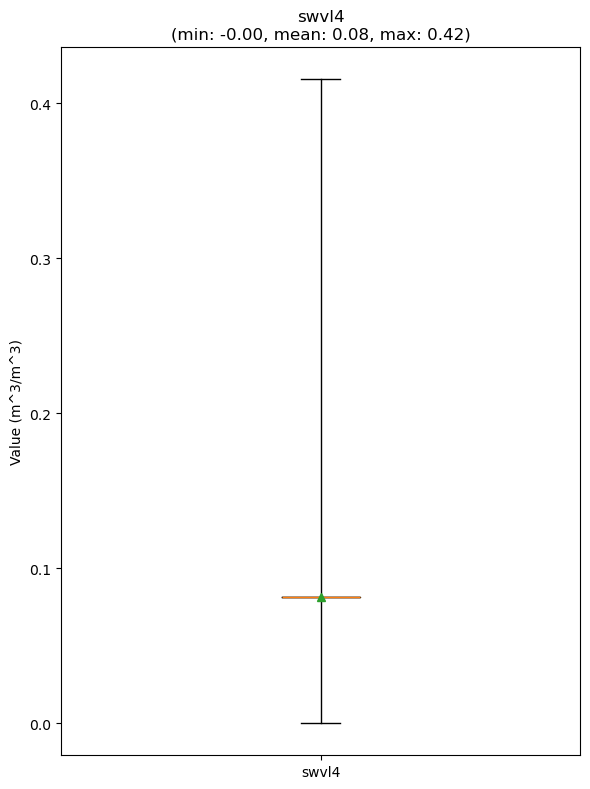

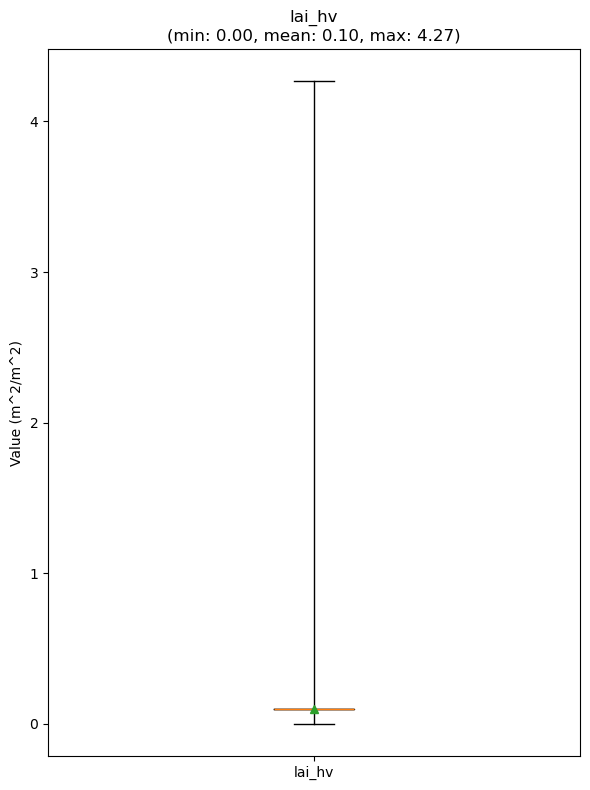

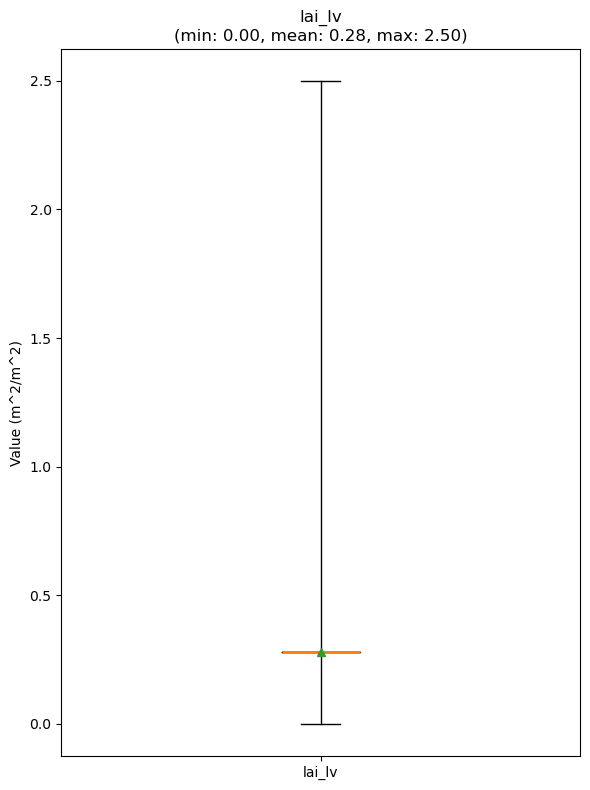

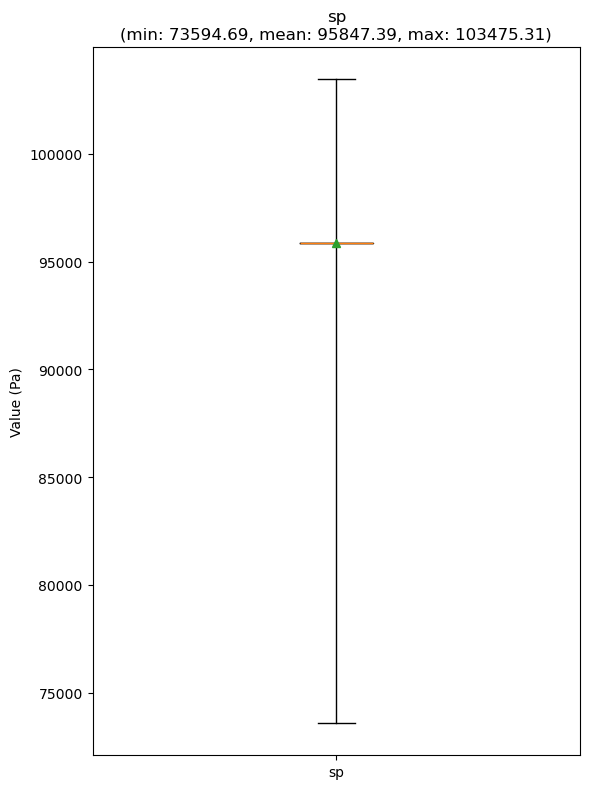

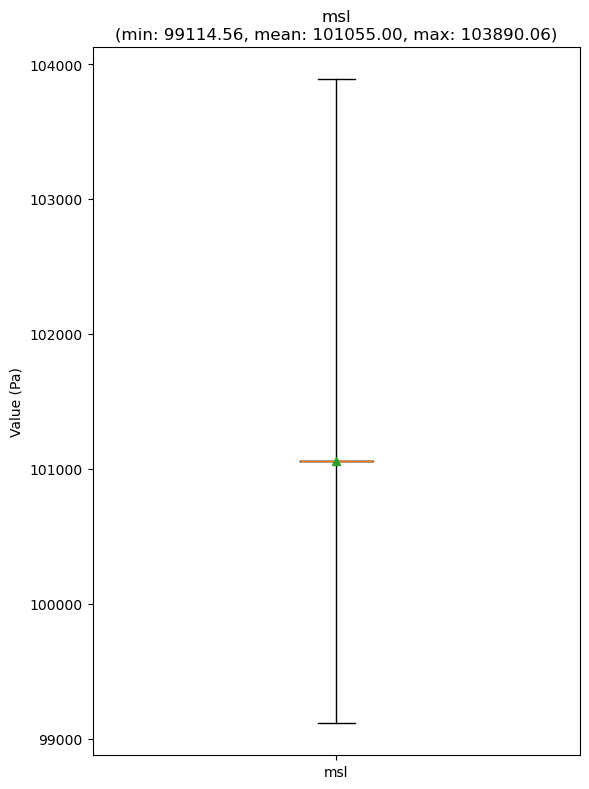

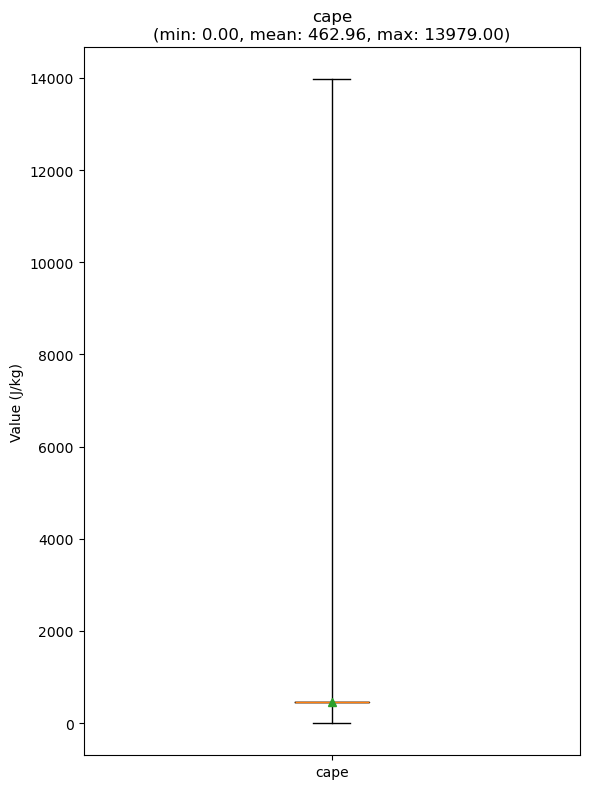

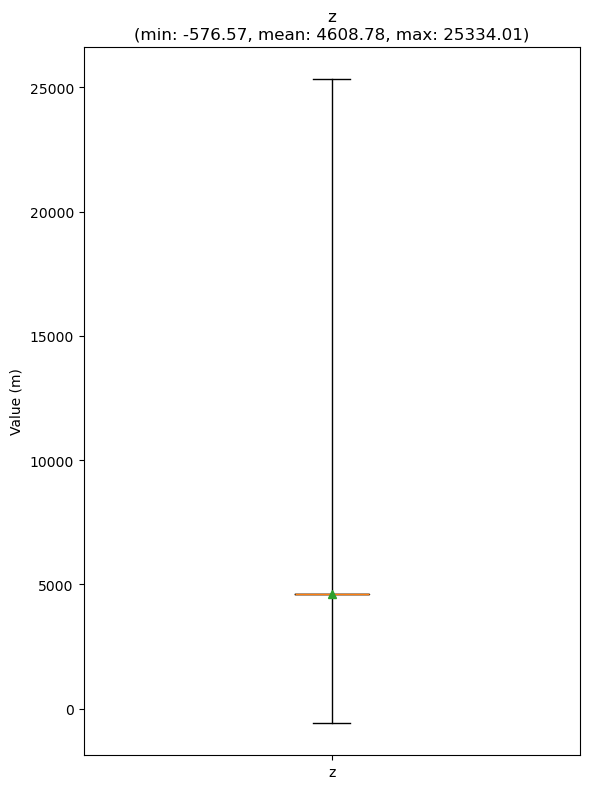

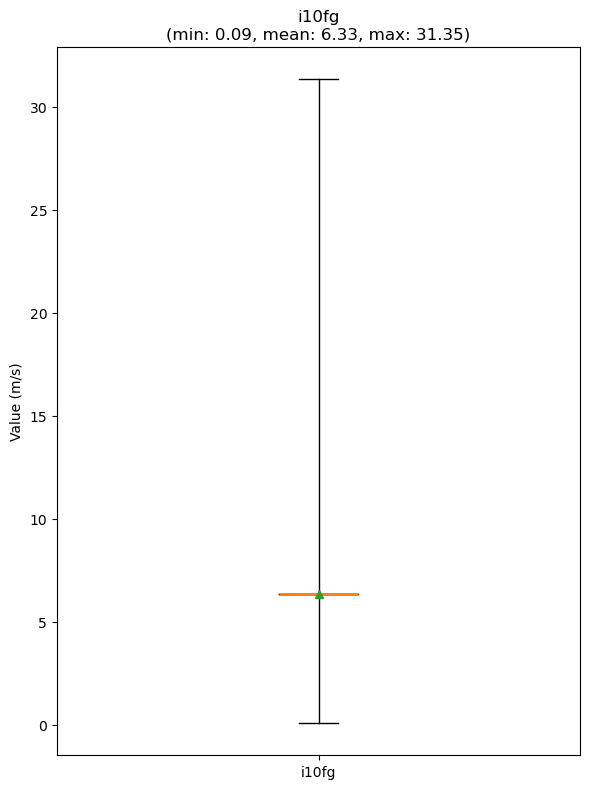

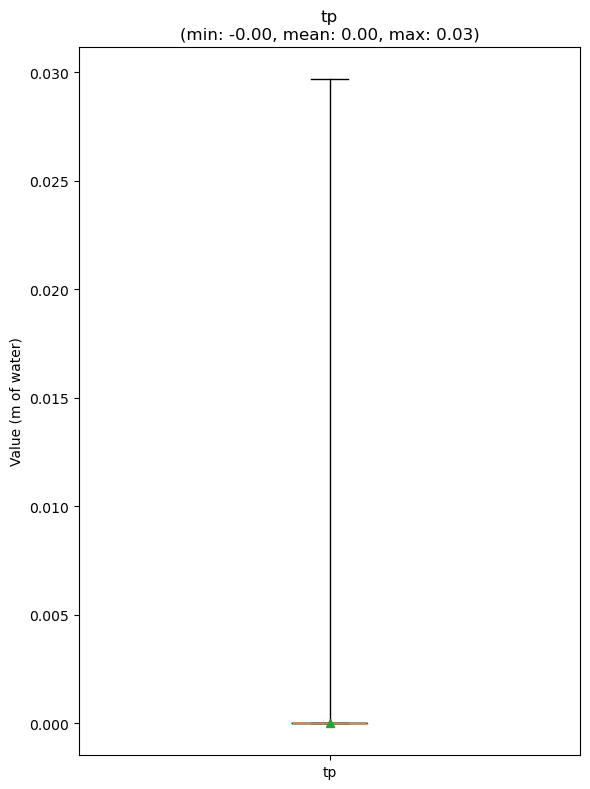

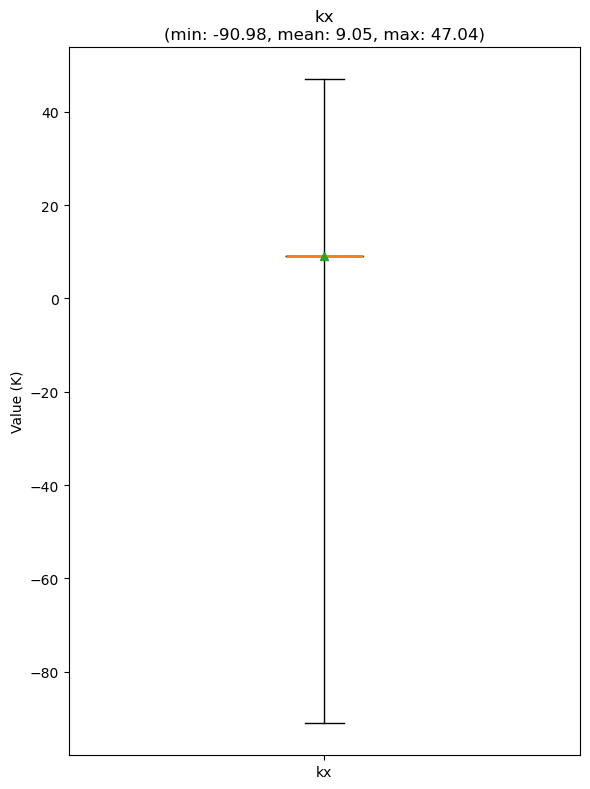

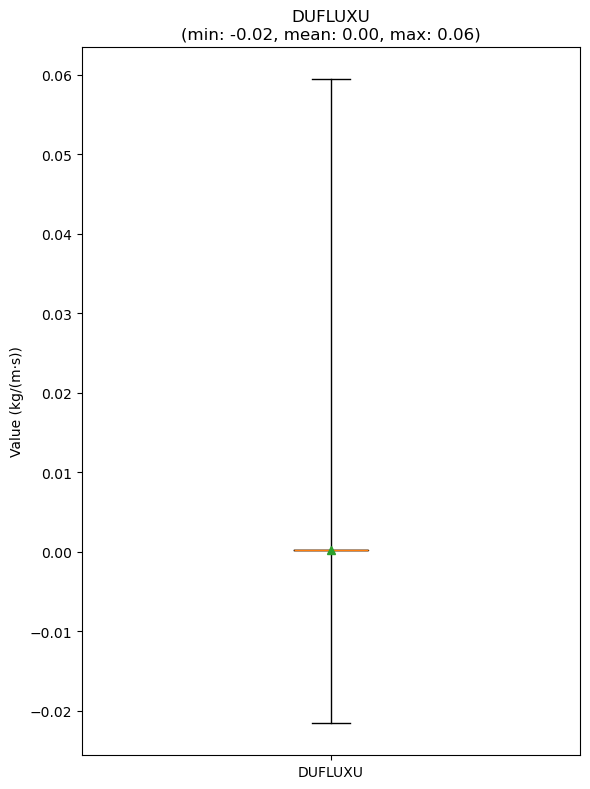

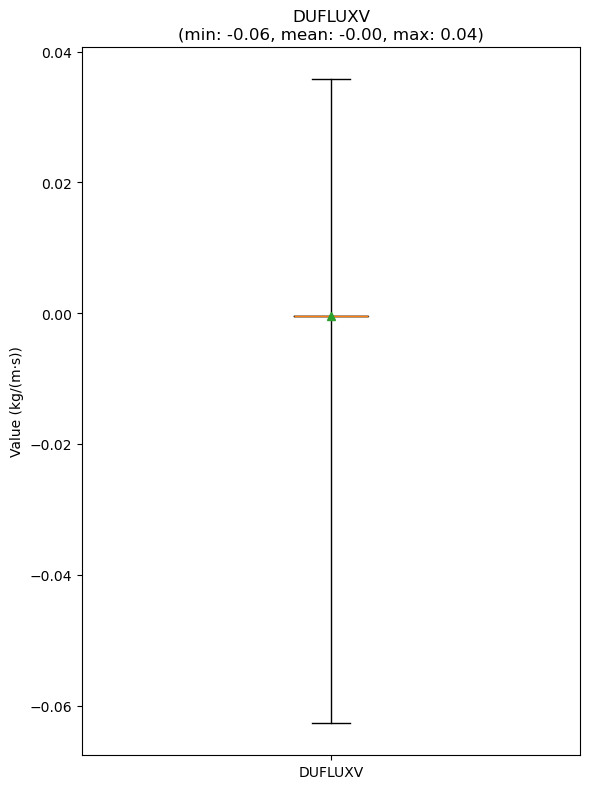

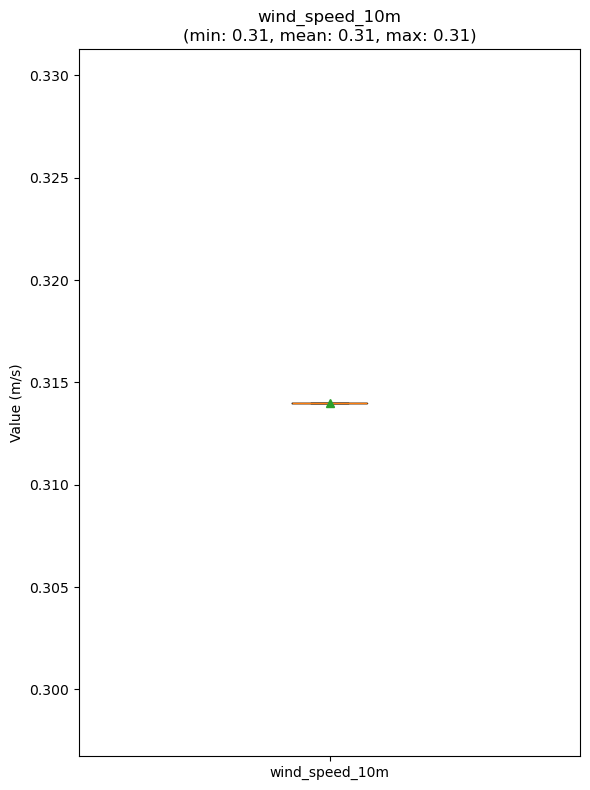

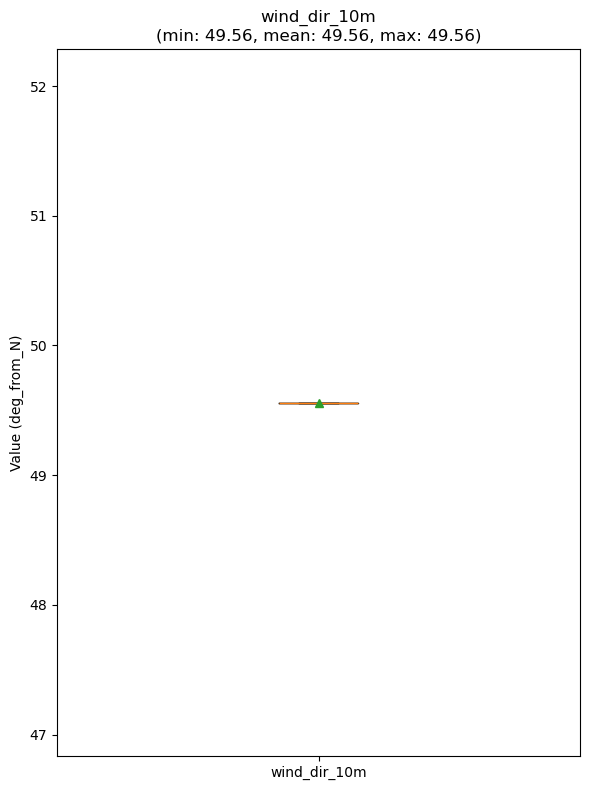

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

# -------------------------------
# 1. Read the CSV file and preprocess
# -------------------------------
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"
df = pd.read_csv(file_path, delimiter=',')

output_dir = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\boxplots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Remove extra whitespace from column names
df.columns = df.columns.str.strip()

# Exclude these columns
cols_to_exclude = [
    'lon', 'lat', 'time', 'level',
    'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1',
    'Month', 'Country', 'h3_res_3', 'h3_res_4'
]
df.drop(columns=cols_to_exclude, inplace=True, errors='ignore')

# Convert all remaining columns to numeric (non-numeric values become NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 2. Group columns by variable base name
# -------------------------------
# We look for variables with a matching pattern: <base>_min, <base>_mean, <base>_max.
param_groups = {}
for col in df.columns:
    if col.endswith("_mean"):
        base = col[:-5]  # remove the "_mean" suffix
        min_col = base + "_min"
        max_col = base + "_max"
        if min_col in df.columns and max_col in df.columns:
            # Compute global statistics for this parameter group
            global_min = df[min_col].min()
            global_mean = df[col].mean()  # using the _mean column for the mean value
            global_max = df[max_col].max()
            param_groups[base] = {"min": global_min, "mean": global_mean, "max": global_max}

# Create a summary DataFrame from the groups
summary = pd.DataFrame.from_dict(param_groups, orient='index')
summary.columns = ['min', 'mean', 'max']
summary["Units"] = ""  # initialize an empty Units column

# -------------------------------
# 3. Unit conversion definitions
# -------------------------------
param_units = {
    # Temperatures (initially in K; will convert to °C below)
    "t2m_mean":        "K",
    "d2m_mean":        "K",
    "sst_mean":        "K",
    "stl1_mean":       "K",
    "stl2_mean":       "K",
    "stl3_mean":       "K",
    "stl4_mean":       "K",
    
    # Wind components
    "u10_mean":        "m/s",
    "v10_mean":        "m/s",
    
    # Radiation (accumulated energy)
    "ssrd_mean":       "J/m^2",
    "strd_mean":       "J/m^2",
    
    # Evaporation
    "e_mean":          "m of water",
    "pev_mean":        "m of water",
    
    # Soil moisture, LAI, etc.
    "swvl1_mean":      "m^3/m^3",
    "swvl2_mean":      "m^3/m^3",
    "swvl3_mean":      "m^3/m^3",
    "swvl4_mean":      "m^3/m^3",
    "lai_hv_mean":     "m^2/m^2",
    "lai_lv_mean":     "m^2/m^2",
    
    # Pressure & others
    "sp_mean":         "Pa",
    "msl_mean":        "Pa",
    "cape_mean":       "J/kg",
    "z_mean":          "m",
    "i10fg_mean":      "m/s",
    "tp_mean":         "m of water",
    "kx_mean":         "K",      # K-index (dimensionless, but often reported in K)
    
    # Dust mass concentrations
    "DUSMASS_mean":    "kg/m^3",  # per MERRA-2 info
    "DUSMASS25_mean":  "kg/m^3",  # per MERRA-2 info
    
    # Dust flux
    "DUFLUXU_mean":    "kg/(m·s)",  # or "kg m^-1 s^-1"
    "DUFLUXV_mean":    "kg/(m·s)"
}

# List of temperature variables (as they appear in the CSV with the _mean suffix)
temp_vars = [
    "t2m_mean", "d2m_mean", "sst_mean", 
    "stl1_mean", "stl2_mean", "stl3_mean", "stl4_mean"
]

# -------------------------------
# 4. Apply unit conversions to the summary statistics
# -------------------------------
for base in summary.index:
    mean_key = base + "_mean"
    # For temperature variables, convert from Kelvin to Celsius
    if mean_key in temp_vars:
        summary.loc[base, 'min'] -= 273.15
        summary.loc[base, 'mean'] -= 273.15
        summary.loc[base, 'max'] -= 273.15
        summary.loc[base, 'Units'] = "°C"
    else:
        # Assign units based on the param_units dictionary
        if mean_key in param_units:
            summary.loc[base, 'Units'] = param_units[mean_key]
        else:
            summary.loc[base, 'Units'] = ""

# (Optional) Compute derived wind and dust flux variables if desired.
# For example, if you wish to compute wind speed/direction from u10 and v10:
if "u10" in param_groups and "v10" in param_groups:
    # Use the mean values from the corresponding _mean columns.
    u10 = df["u10_mean"].mean()
    v10 = df["v10_mean"].mean()
    wind_speed_10m = math.sqrt(u10**2 + v10**2)
    theta_deg = math.degrees(math.atan2(v10, u10))
    wind_dir_10m = (270.0 - theta_deg) % 360.0
    summary.loc["wind_speed_10m"] = {"min": wind_speed_10m, "mean": wind_speed_10m, "max": wind_speed_10m, "Units": "m/s"}
    summary.loc["wind_dir_10m"]   = {"min": wind_dir_10m,   "mean": wind_dir_10m,   "max": wind_dir_10m,   "Units": "deg_from_N"}

# Similarly, you could compute derived dust flux variables from DUFLUXU_mean and DUFLUXV_mean if needed.

# -------------------------------
# 5. Plot a custom box plot for each parameter group
# -------------------------------
# For each parameter group, we create a custom box plot where:
#   - The bottom whisker is the global min,
#   - The top whisker is the global max,
#   - The "box" (and median) is drawn at the global mean.
for base in summary.index:
    param_min = summary.loc[base, "min"]
    param_mean = summary.loc[base, "mean"]
    param_max = summary.loc[base, "max"]
    units = summary.loc[base, "Units"]
    
    # Build the custom stats for the box plot
    box_stats = [{
        'mean': param_mean,
        'med': param_mean,
        'q1': param_mean,
        'q3': param_mean,
        'whislo': param_min,
        'whishi': param_max,
        'fliers': []  # do not show outliers
    }]
    
    # Create and show the plot
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.bxp(box_stats, showmeans=True, meanline=False)
    ax.set_xticklabels([base])
    ax.set_ylabel(f'Value ({units})')
    ax.set_title(f"{base}\n(min: {param_min:.2f}, mean: {param_mean:.2f}, max: {param_max:.2f})")
    plt.tight_layout()
    save_path = os.path.join(output_dir, f"{base}_boxplot.png")
    plt.savefig(save_path)
    plt.show()
    plt.close(fig)


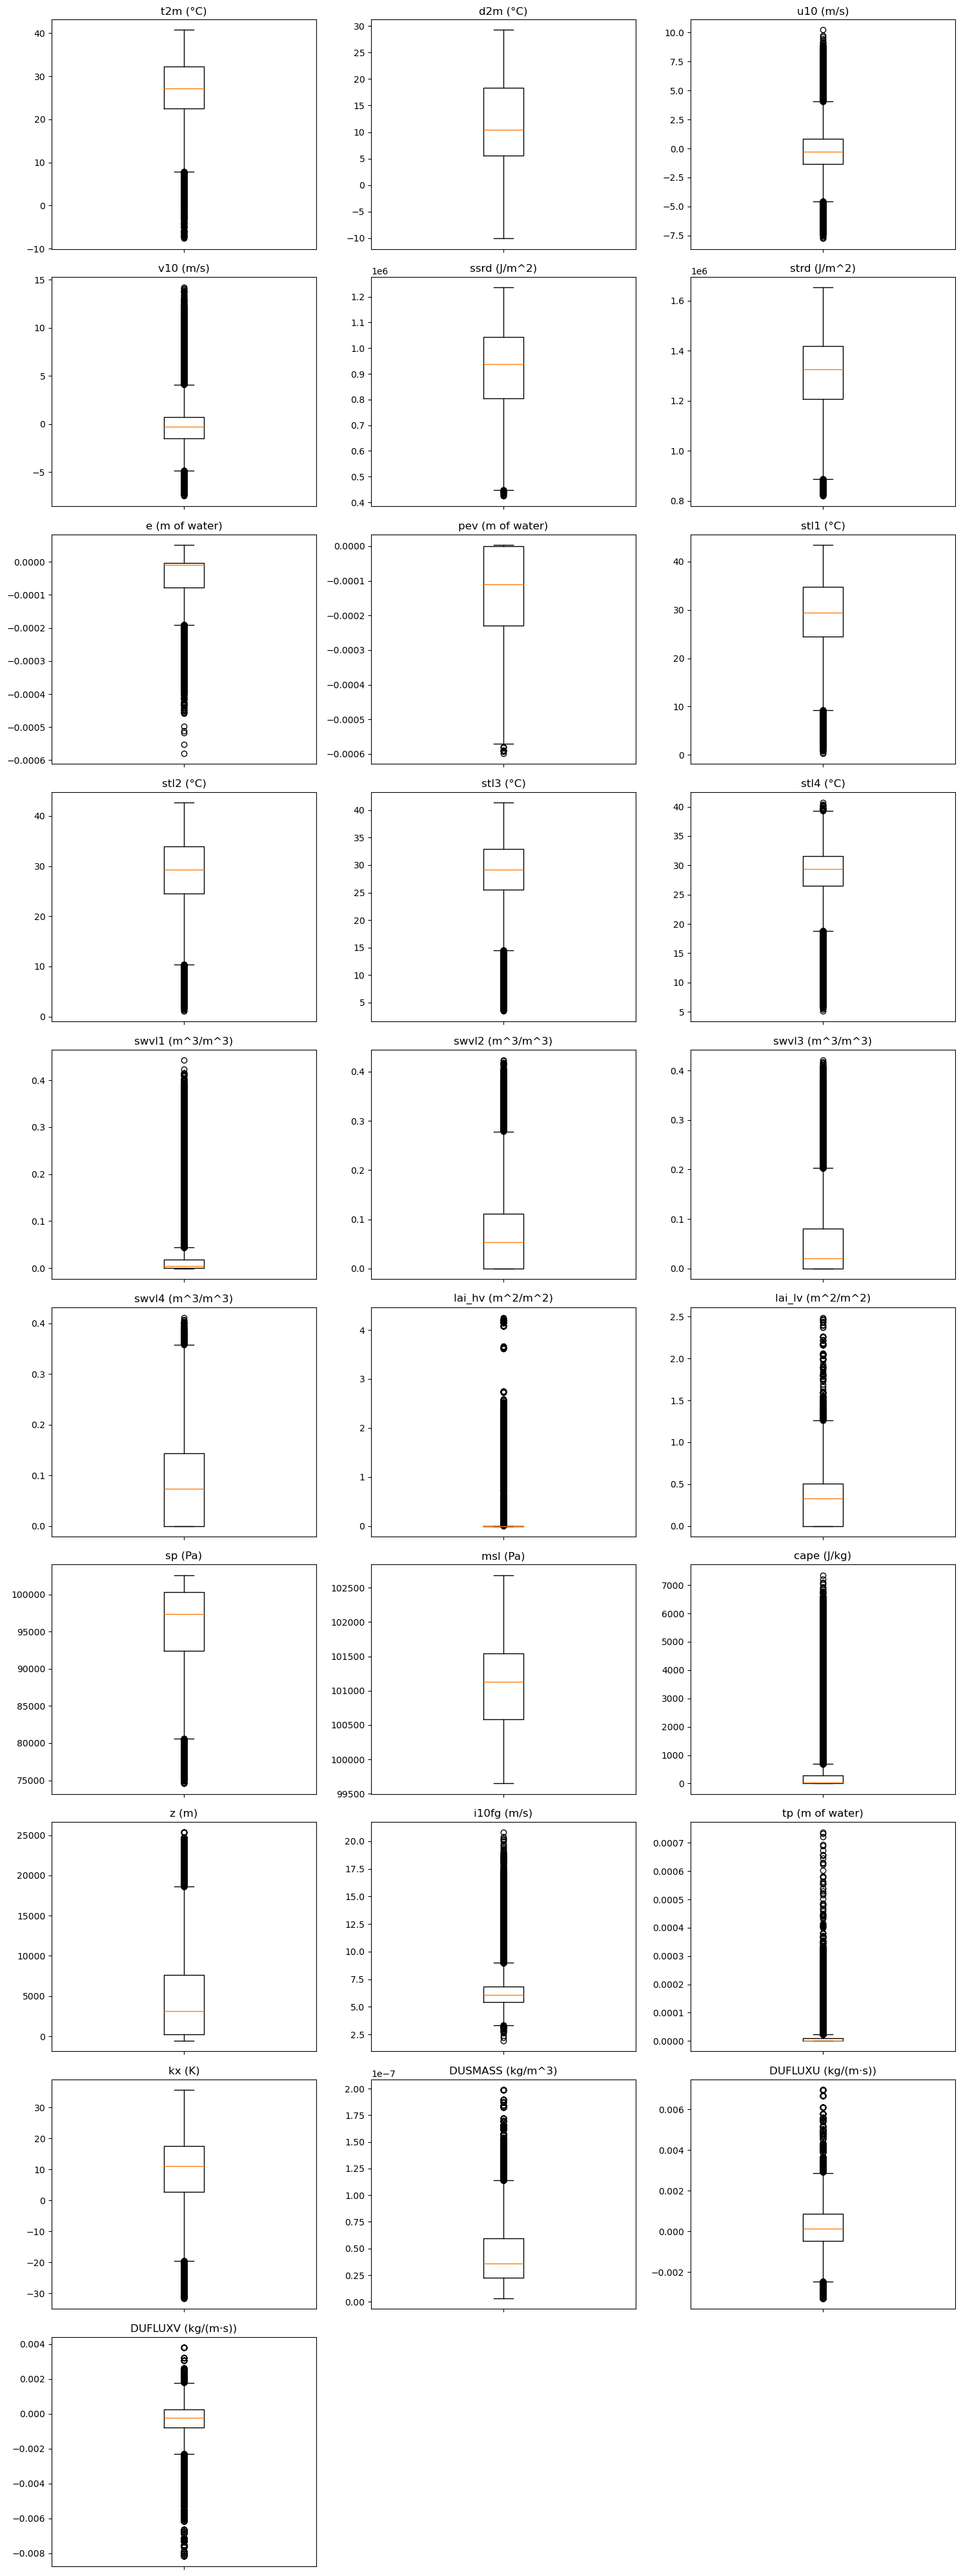

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import numpy as np

# -------------------------------
# 1. Read the CSV file and preprocess
# -------------------------------
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"
# Adjust delimiter if needed (here using comma as per your snippet)
df = pd.read_csv(file_path, delimiter=',')

# Output directory for the plots
output_dir = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\boxplots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Remove extra whitespace from column names
df.columns = df.columns.str.strip()

# Exclude specified columns
cols_to_exclude = [
    'lon', 'lat', 'time', 'level',
    'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1',
    'Month', 'Country', 'h3_res_3', 'h3_res_4'
]
df.drop(columns=cols_to_exclude, inplace=True, errors='ignore')

# Convert all remaining columns to numeric (non-numeric become NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 2. Extract variable series from the "_mean" columns
# -------------------------------
# We assume that the distribution of interest for each variable is given by its _mean column.
variable_series = {}
for col in df.columns:
    if col.endswith("_mean"):
        base = col[:-5]  # e.g., "t2m" from "t2m_mean"
        series = df[col].dropna()
        # For temperature variables, convert from Kelvin to Celsius
        if col in ["t2m_mean", "d2m_mean", "sst_mean", "stl1_mean", "stl2_mean", "stl3_mean", "stl4_mean"]:
            series = series - 273.15
        variable_series[base] = series

# -------------------------------
# 3. Define units for the variables
# -------------------------------
param_units = {
    # Temperatures – already converted to Celsius
    "t2m_mean":        "°C",
    "d2m_mean":        "°C",
    "sst_mean":        "°C",
    "stl1_mean":       "°C",
    "stl2_mean":       "°C",
    "stl3_mean":       "°C",
    "stl4_mean":       "°C",
    
    # Wind components
    "u10_mean":        "m/s",
    "v10_mean":        "m/s",
    
    # Radiation
    "ssrd_mean":       "J/m^2",
    "strd_mean":       "J/m^2",
    
    # Evaporation
    "e_mean":          "m of water",
    "pev_mean":        "m of water",
    
    # Soil moisture, LAI, etc.
    "swvl1_mean":      "m^3/m^3",
    "swvl2_mean":      "m^3/m^3",
    "swvl3_mean":      "m^3/m^3",
    "swvl4_mean":      "m^3/m^3",
    "lai_hv_mean":     "m^2/m^2",
    "lai_lv_mean":     "m^2/m^2",
    
    # Pressure & others
    "sp_mean":         "Pa",
    "msl_mean":        "Pa",
    "cape_mean":       "J/kg",
    "z_mean":          "m",
    "i10fg_mean":      "m/s",
    "tp_mean":         "m of water",
    "kx_mean":         "K",
    
    # Dust mass concentrations
    "DUSMASS_mean":    "kg/m^3",
    "DUSMASS25_mean":  "kg/m^3",
    
    # Dust flux
    "DUFLUXU_mean":    "kg/(m·s)",
    "DUFLUXV_mean":    "kg/(m·s)"
}

# Build a dictionary mapping each base variable to its unit.
variable_units = {}
for base in variable_series:
    key = base + "_mean"
    variable_units[base] = param_units.get(key, "")

# -------------------------------
# 4. Create facet-wrapped box plots (true box plots)
# -------------------------------
n_vars = len(variable_series)
ncols = 3  # set number of columns for the facet wrap
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
axes = np.array(axes).reshape(-1)  # flatten the axes array

for i, (base, series) in enumerate(variable_series.items()):
    ax = axes[i]
    # Produce a standard boxplot; this computes Q1, median, Q3, whiskers, and outliers.
    ax.boxplot(series, notch=False)
    unit = variable_units[base]
    ax.set_title(f"{base} ({unit})")
    # Remove the x-axis tick label since the title is sufficient.
    ax.set_xticklabels([])

# Hide any extra subplots (if n_vars does not fill the grid)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

# Save the facet wrapped figure to the output directory.
#facet_save_path = os.path.join(output_dir, "facet_boxplots.png")
#plt.savefig(facet_save_path)
plt.show()
#plt.close(fig)


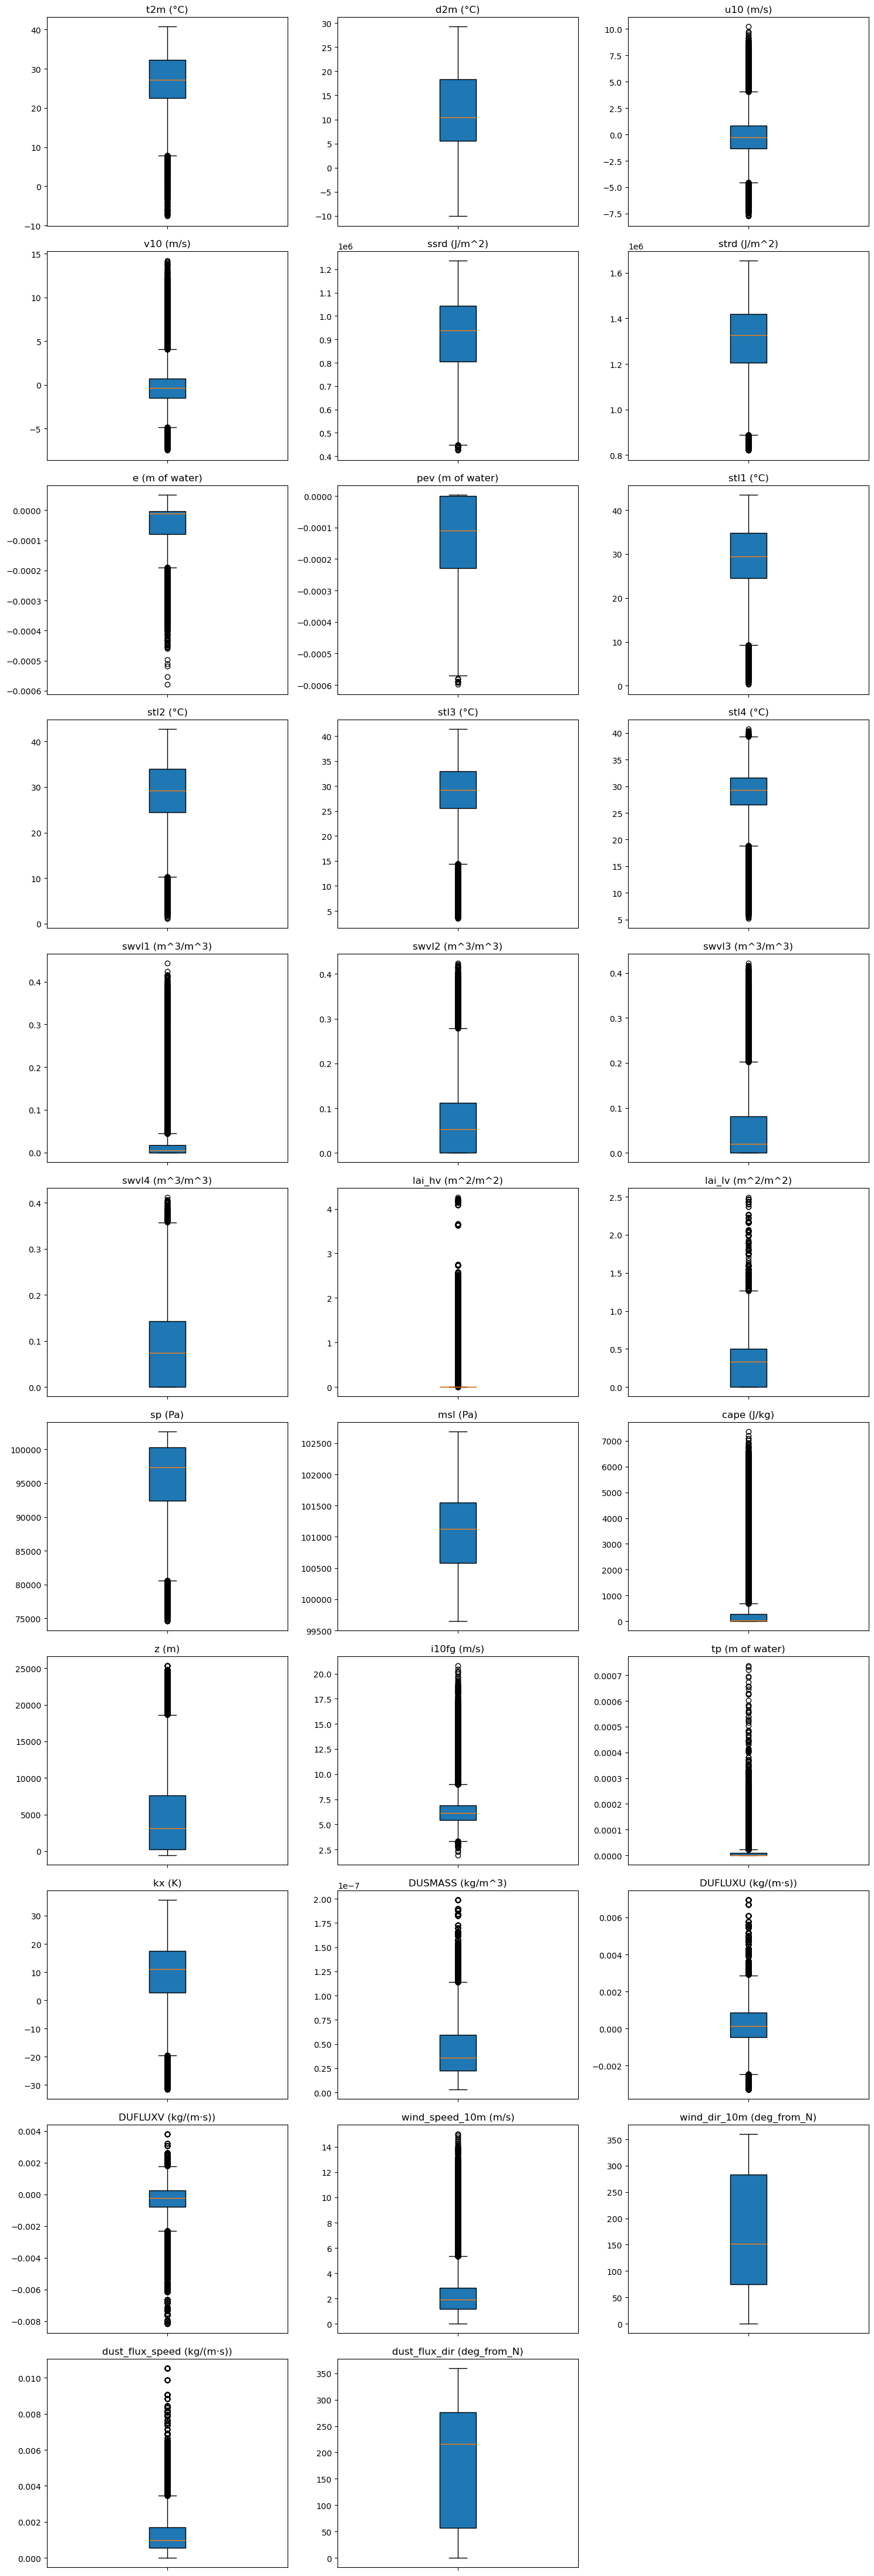

In [28]:
#wind component magnitude and directions

import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import numpy as np

# -------------------------------
# 1. Read the CSV file and preprocess
# -------------------------------
file_path = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\sfc_row_level_predictions_2023_v0063_H3res4.csv"
# Adjust delimiter if needed; here we use comma as per your snippet.
df = pd.read_csv(file_path, delimiter=',')

# Output directory for the plots
output_dir = r"Z:\Thesis\Data\test\DustCast\SFC\DC_v0063\boxplots"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Remove extra whitespace from column names
df.columns = df.columns.str.strip()

# Exclude specified columns
cols_to_exclude = [
    'lon', 'lat', 'time', 'level',
    'DMI_EAST_HadISST1.1', 'DMI_HadISST1.1',
    'Month', 'Country', 'h3_res_3', 'h3_res_4'
]
df.drop(columns=cols_to_exclude, inplace=True, errors='ignore')

# Convert all remaining columns to numeric (non-numeric become NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 2. Build dictionary of variable series from _mean columns
# -------------------------------
# For each column ending with "_mean", we assume that is our distribution of interest.
variable_series = {}
for col in df.columns:
    if col.endswith("_mean"):
        base = col[:-5]  # e.g. "t2m" from "t2m_mean"
        series = df[col].dropna()
        # For temperature variables, convert from Kelvin to Celsius
        if col in ["t2m_mean", "d2m_mean", "sst_mean", "stl1_mean", "stl2_mean", "stl3_mean", "stl4_mean"]:
            series = series - 273.15
        variable_series[base] = series

# -------------------------------
# 3. Compute derived wind and dust flux variables
# -------------------------------
# Compute wind speed and wind direction for 10-m wind from u10_mean and v10_mean.
if "u10_mean" in df.columns and "v10_mean" in df.columns:
    wind_speed = np.sqrt(df["u10_mean"]**2 + df["v10_mean"]**2)
    theta_deg = np.degrees(np.arctan2(df["v10_mean"], df["u10_mean"]))
    wind_dir = (270.0 - theta_deg) % 360.0
    # Add these derived series to our dictionary
    variable_series["wind_speed_10m"] = wind_speed.dropna()
    variable_series["wind_dir_10m"]   = wind_dir.dropna()

# Compute dust flux speed and direction from DUFLUXU_mean and DUFLUXV_mean.
if "DUFLUXU_mean" in df.columns and "DUFLUXV_mean" in df.columns:
    dust_flux_speed = np.sqrt(df["DUFLUXU_mean"]**2 + df["DUFLUXV_mean"]**2)
    theta_du = np.degrees(np.arctan2(df["DUFLUXV_mean"], df["DUFLUXU_mean"]))
    dust_flux_dir = (270.0 - theta_du) % 360.0
    variable_series["dust_flux_speed"] = dust_flux_speed.dropna()
    variable_series["dust_flux_dir"]   = dust_flux_dir.dropna()

# -------------------------------
# 4. Define units for each variable
# -------------------------------
param_units = {
    # Temperatures – already converted to °C
    "t2m_mean":        "°C",
    "d2m_mean":        "°C",
    "sst_mean":        "°C",
    "stl1_mean":       "°C",
    "stl2_mean":       "°C",
    "stl3_mean":       "°C",
    "stl4_mean":       "°C",
    
    # Wind components (we'll derive wind speed/direction)
    "u10_mean":        "m/s",
    "v10_mean":        "m/s",
    
    # Radiation
    "ssrd_mean":       "J/m^2",
    "strd_mean":       "J/m^2",
    
    # Evaporation
    "e_mean":          "m of water",
    "pev_mean":        "m of water",
    
    # Soil moisture, LAI, etc.
    "swvl1_mean":      "m^3/m^3",
    "swvl2_mean":      "m^3/m^3",
    "swvl3_mean":      "m^3/m^3",
    "swvl4_mean":      "m^3/m^3",
    "lai_hv_mean":     "m^2/m^2",
    "lai_lv_mean":     "m^2/m^2",
    
    # Pressure & others
    "sp_mean":         "Pa",
    "msl_mean":        "Pa",
    "cape_mean":       "J/kg",
    "z_mean":          "m",
    "i10fg_mean":      "m/s",
    "tp_mean":         "m of water",
    "kx_mean":         "K",
    
    # Dust mass concentrations
    "DUSMASS_mean":    "kg/m^3",
    "DUSMASS25_mean":  "kg/m^3",
    
    # Dust flux (components; derived below)
    "DUFLUXU_mean":    "kg/(m·s)",
    "DUFLUXV_mean":    "kg/(m·s)"
}

# Build a mapping for our derived and _mean series.
variable_units = {}
for key in variable_series:
    # For derived variables, manually set units:
    if key == "wind_speed_10m":
        variable_units[key] = "m/s"
    elif key == "wind_dir_10m":
        variable_units[key] = "deg_from_N"
    elif key == "dust_flux_speed":
        variable_units[key] = "kg/(m·s)"
    elif key == "dust_flux_dir":
        variable_units[key] = "deg_from_N"
    else:
        # For other variables, try to get the unit using the _mean key.
        mean_key = key + "_mean"
        variable_units[key] = param_units.get(mean_key, "")

# -------------------------------
# 5. Create facet-wrapped box plots for all variables
# -------------------------------
n_vars = len(variable_series)
ncols = 3  # number of columns in the facet wrap
nrows = math.ceil(n_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
axes = np.array(axes).reshape(-1)  # flatten the axes array

for i, (base, series) in enumerate(variable_series.items()):
    ax = axes[i]
    # Produce a standard boxplot: this computes Q1, median, Q3, whiskers, and outliers.
    ax.boxplot(series, notch=False, patch_artist=True)
    unit = variable_units.get(base, "")
    ax.set_title(f"{base} ({unit})")
    # Optionally, remove x-axis tick labels if they add clutter.
    ax.set_xticklabels([])
    
# Hide any extra subplots if the grid is not completely filled.
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

# Save the facet-wrapped figure to the output directory.
#facet_save_path = os.path.join(output_dir, "facet_boxplots.png")
#plt.savefig(facet_save_path)
plt.show()
#plt.close(fig)
